




# **National Higher School of Artificial Intelligence**
## **Individual Project 2024/2025**
### **By Student: Akram FADENE**



---


# **Time Series Analysis of Daily New Confirmed COVID-19 Cases per Million People in Algeria**





---
# **1. Abstract**  
This study analyzes the daily new confirmed COVID-19 cases per million people in Algeria using a **7-day rolling average** to smooth short-term fluctuations. Given **limited testing capacity**, the reported case counts likely underestimate actual infections.  

Using data from the **World Health Organization (WHO) (2025)** and **population estimates (2024)**, this research examines **historical trends, peak infection periods, and future case forecasts** through **time series analysis techniques**. The findings provide valuable insights into the **pandemic's trajectory**, helping inform public health policies and preparedness strategies.  



---
# **2. Introduction**  

Understanding how infectious diseases spread is crucial for making informed public health decisions. The COVID-19 pandemic has significantly affected societies worldwide, disrupting healthcare systems, economies, and daily life. In Algeria, monitoring the number of new daily confirmed COVID-19 cases per million people provides valuable insights into the virus’s progression and the effectiveness of containment measures.

This dataset, compiled from the **World Health Organization (WHO) (2025)** and **population estimates (2024)**, captures daily trends in reported COVID-19 infections. By analyzing these trends, we can better understand when infection rates peaked, how cases fluctuated over time, and whether interventions such as lockdowns and vaccination campaigns had an impact. A **7-day rolling average** is used to smooth out short-term variations in case reporting, offering a clearer picture of broader trends. However, due to **testing limitations**, reported cases may not fully reflect actual infection rates.

Investigating this data helps public health officials, researchers, and policymakers evaluate past responses and prepare for potential future outbreaks. By identifying patterns in the spread of COVID-19, we can improve strategies for disease control, enhance public awareness, and strengthen healthcare preparedness for similar challenges in the future.



---
# **3. Load & Explore The Dataset**


In [290]:
library(tidyverse)
library(tseries)
library(urca)
library(forecast)
library(rugarch)
library(gridExtra)
library(RCurl)


## 3.1 Load Needed Libraries


## 3.2 Load The Dataset


In [291]:
df <- read.csv("https://raw.githubusercontent.com/Fadene-Akram/Time-Serie-Individual-project-/refs/heads/main/algeria_covid19_daily_confirmed_cases_per_million_people_data.csv")


## 3.3 Exploring the Dataset

### 3.3.1 Show the first few rows

In [292]:
head(df)

,Entity,Day,Daily.new.confirmed.cases.of.COVID.19.per.million.people..rolling.7.day.average..right.aligned.
,<chr>,<chr>,<dbl>
1,Algeria,2020-01-09,0
2,Algeria,2020-01-10,0
3,Algeria,2020-01-11,0
4,Algeria,2020-01-12,0
5,Algeria,2020-01-13,0
6,Algeria,2020-01-14,0


### 3.3.2 Check column names, data types, and structure

In [293]:
str(df)

'data.frame':	1880 obs. of  3 variables:
 $ Entity                                                                                         : chr  "Algeria" "Algeria" "Algeria" "Algeria" ...
 $ Day                                                                                            : chr  "2020-01-09" "2020-01-10" "2020-01-11" "2020-01-12" ...
 $ Daily.new.confirmed.cases.of.COVID.19.per.million.people..rolling.7.day.average..right.aligned.: num  0 0 0 0 0 0 0 0 0 0 ...


### 3.3.3 Data Cleaning
- Convert Day Column to Date Format change
- Rename the Long Column Name for Simplicity

In [294]:
df$Day <- as.Date(df$Day, format="%Y-%m-%d")
colnames(df)[3] <- "CasesPerMillion"

str(df)

'data.frame':	1880 obs. of  3 variables:
 $ Entity         : chr  "Algeria" "Algeria" "Algeria" "Algeria" ...
 $ Day            : Date, format: "2020-01-09" "2020-01-10" ...
 $ CasesPerMillion: num  0 0 0 0 0 0 0 0 0 0 ...


### 3.3.4 Check missing values

In [295]:
colSums(is.na(df))

Entity             Day CasesPerMillion 
              0               0               0

### 3.3.5 Get summary statistics

In [296]:
summary(df)

    Entity               Day             CasesPerMillion   
 Length:1880        Min.   :2020-01-09   Min.   : 0.00000  
 Class :character   1st Qu.:2021-04-22   1st Qu.: 0.01257  
 Mode  :character   Median :2022-08-05   Median : 0.11623  
                    Mean   :2022-08-05   Mean   : 3.18402  
                    3rd Qu.:2023-11-18   3rd Qu.: 3.92424  
                    Max.   :2025-03-02   Max.   :47.88251  

### 3.3.6 Convert to Time Series Object

In [297]:
ts_data <- ts(df$CasesPerMillion, start=c(2020, 1), frequency=365) # Daily frequency

## 3.4 Time Serie Visulaization

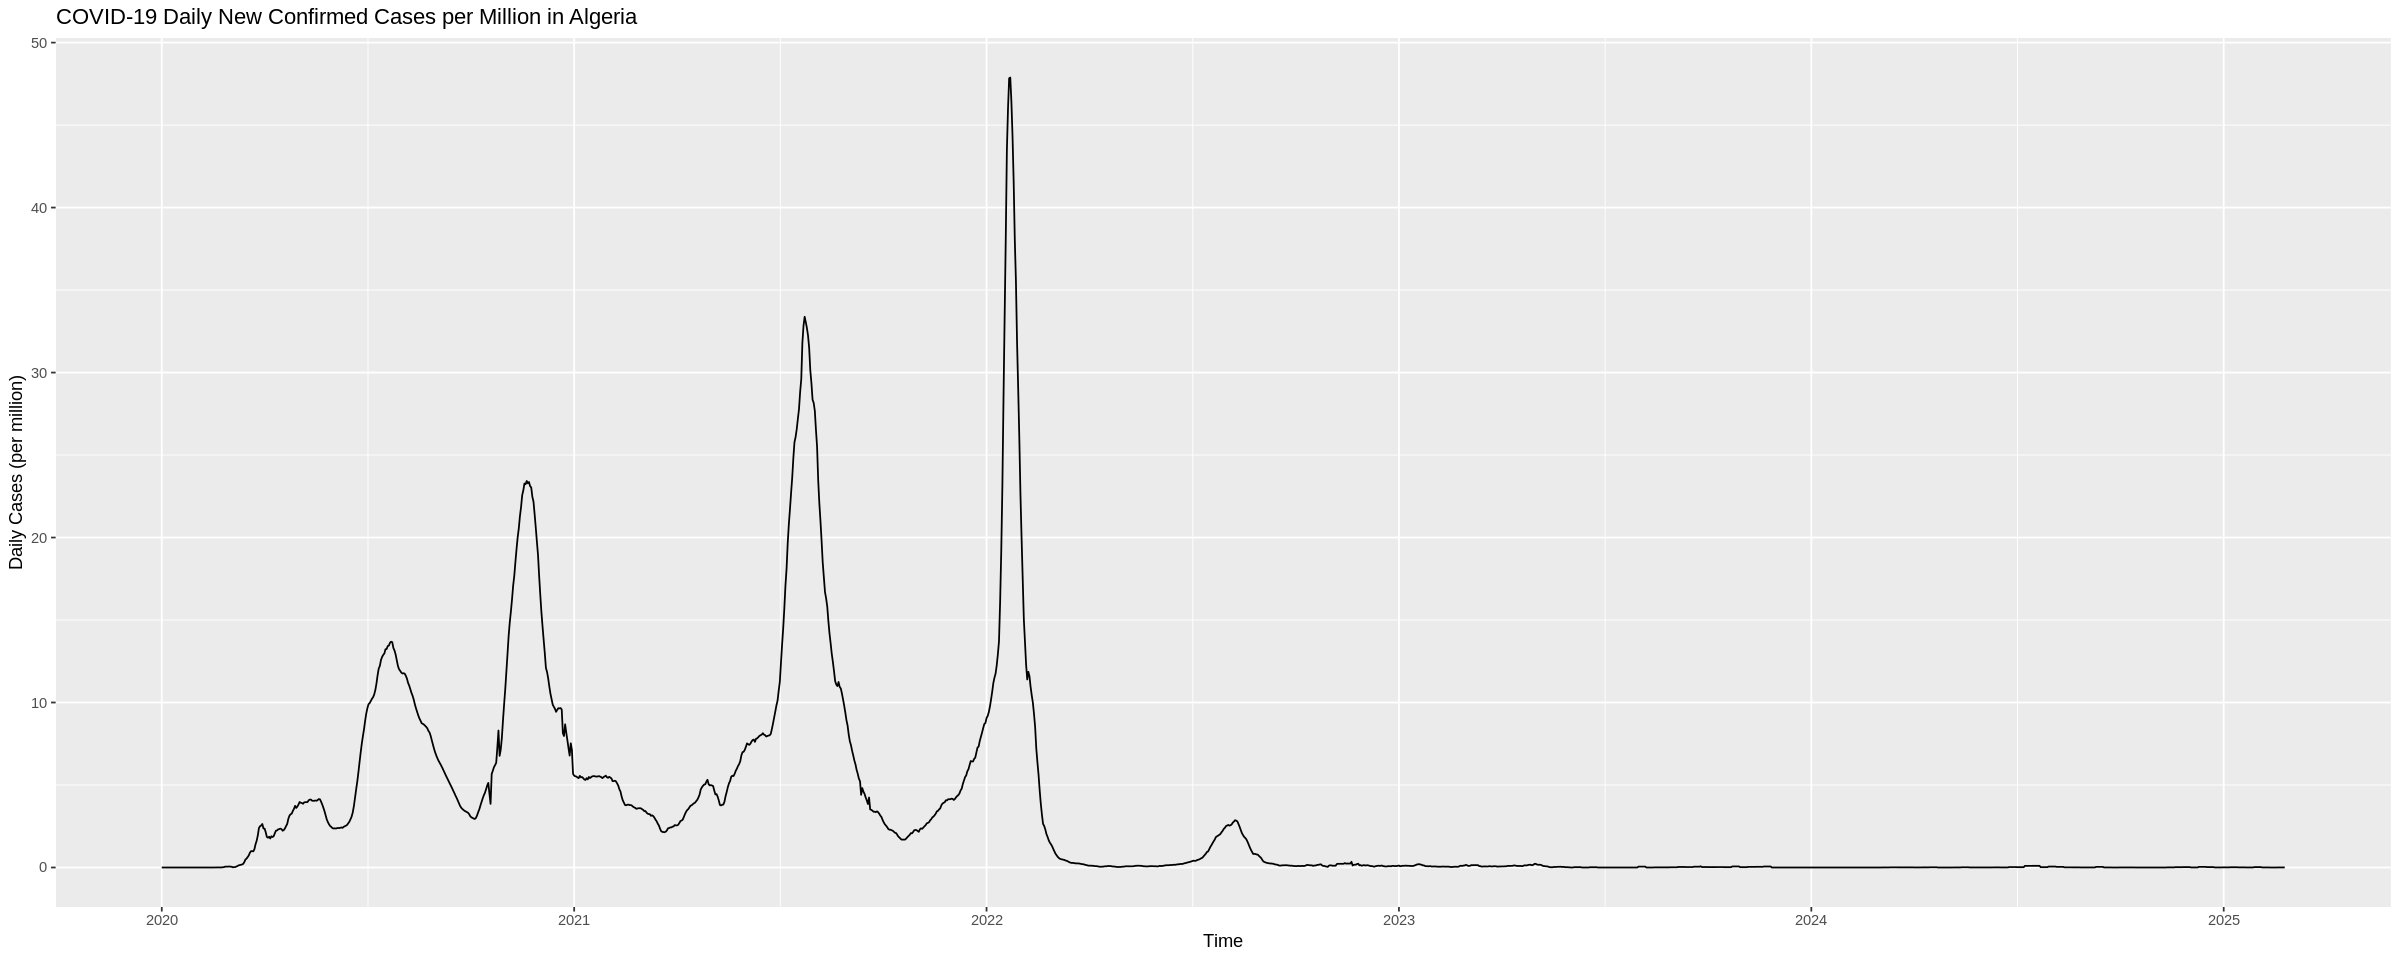

In [298]:
options(repr.plot.width = 20, repr.plot.height = 8)

# Create and display the plot
autoplot(ts_data) +
  ggtitle("COVID-19 Daily New Confirmed Cases per Million in Algeria") +
  xlab("Time") +
  ylab("Daily Cases (per million)")


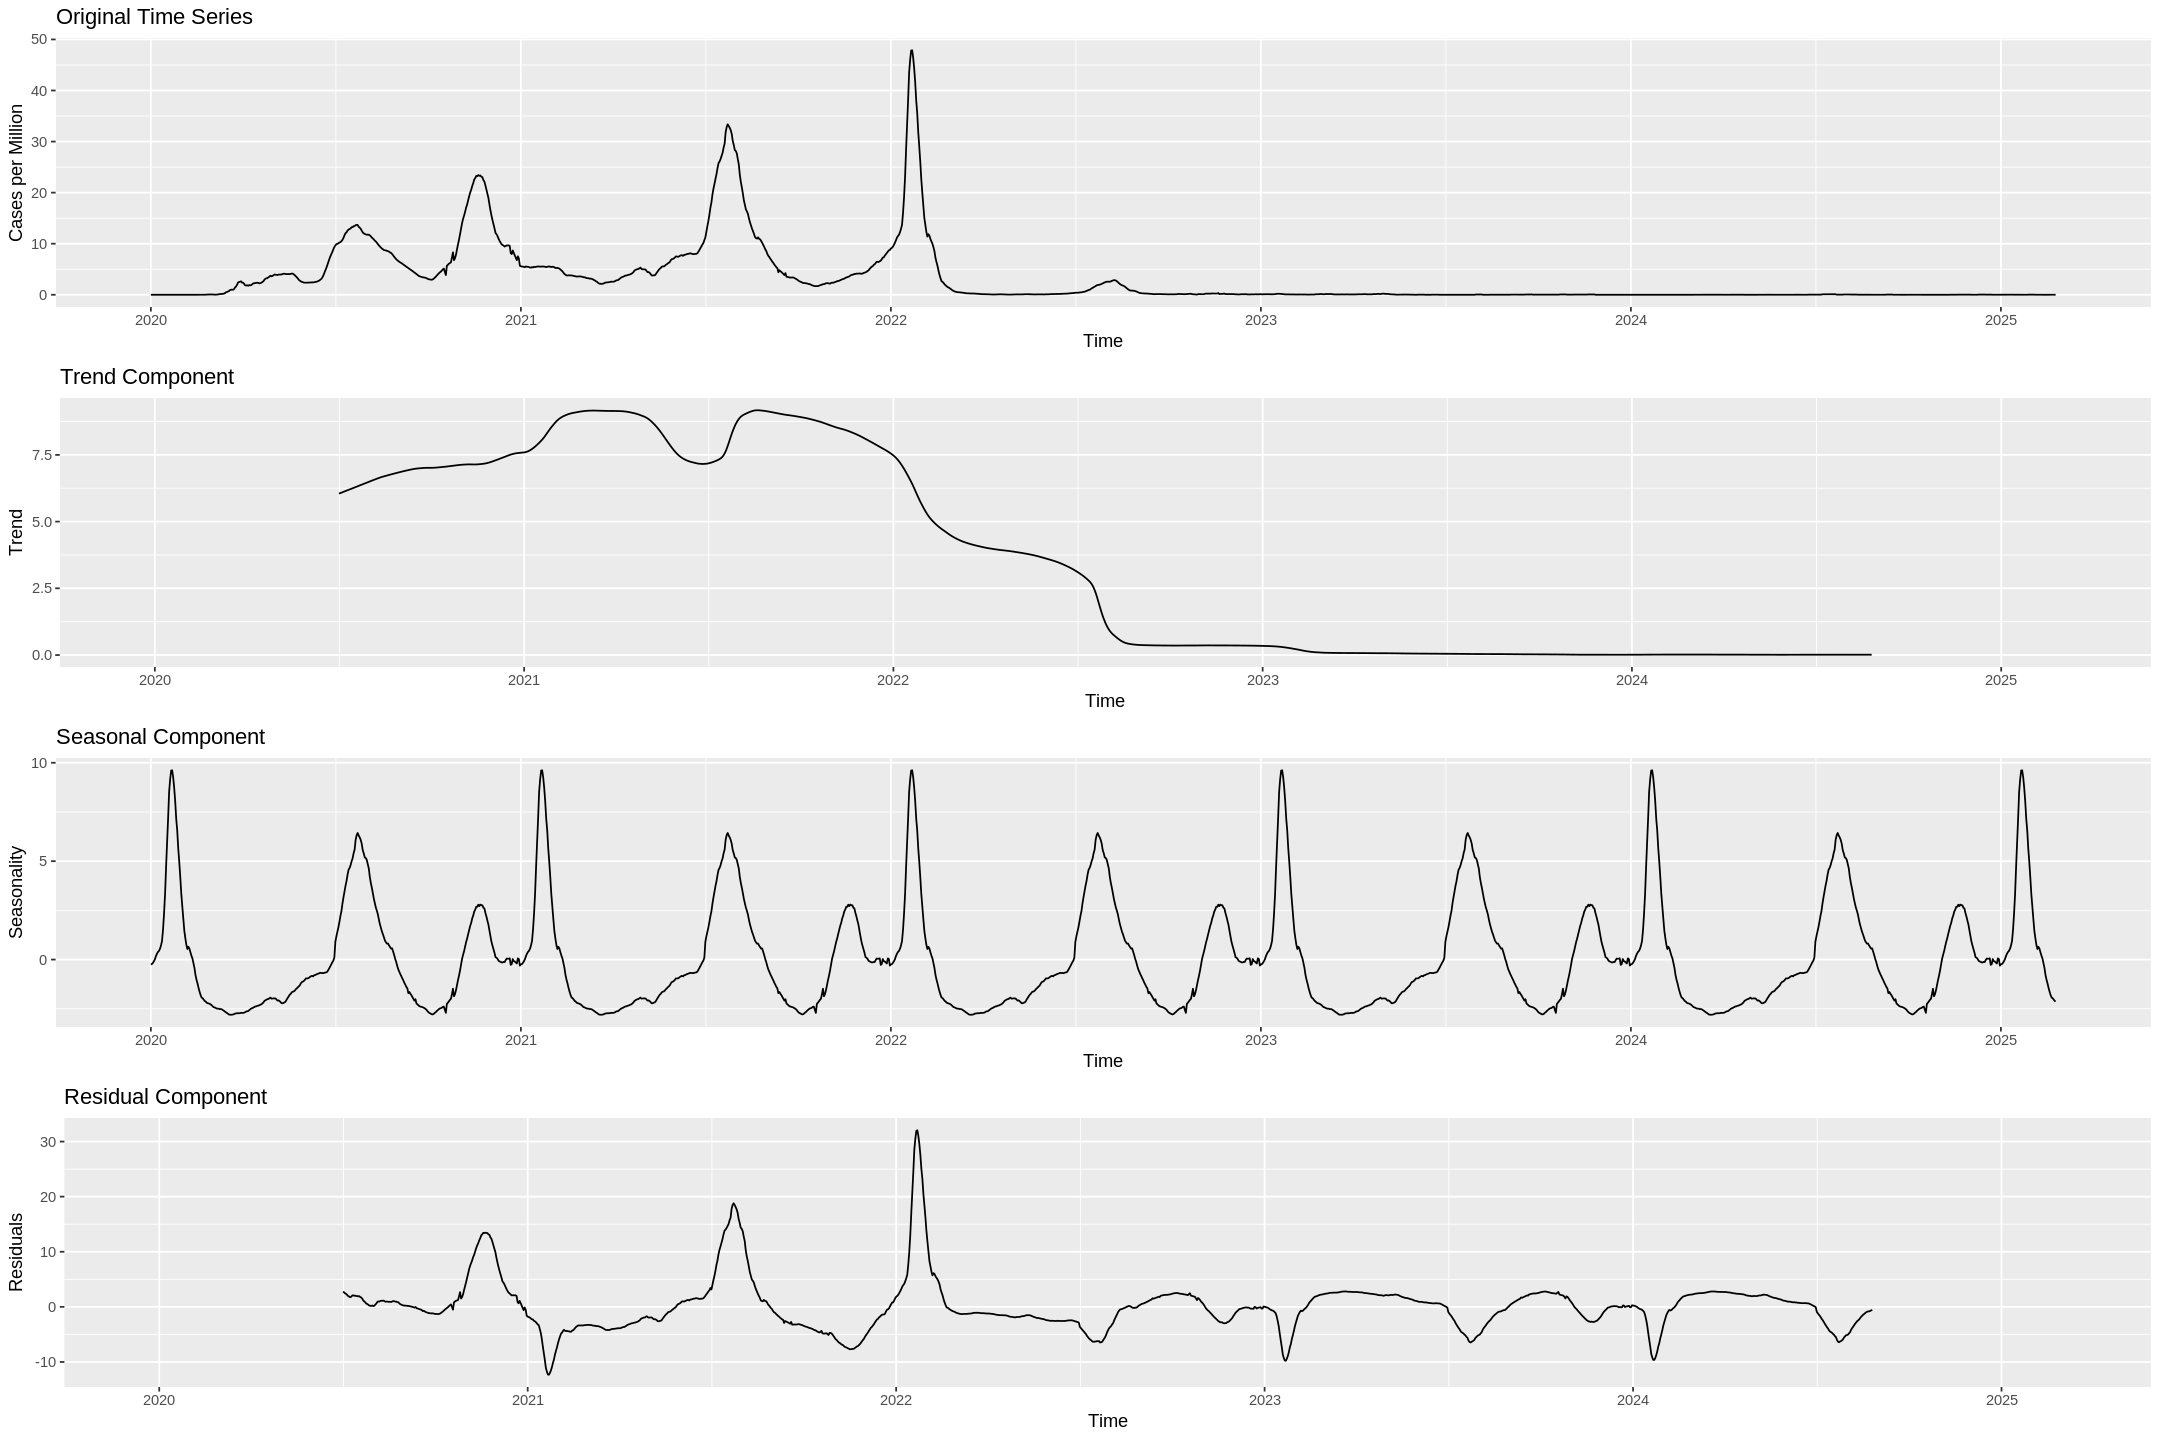

In [299]:
options(repr.plot.width = 18, repr.plot.height = 12)

# Perform decomposition
decomposition <- decompose(ts_data)

# Create plots using ggplot2 for better aesthetics
p1 <- autoplot(ts_data) +
  ggtitle("Original Time Series") +
  xlab("Time") +
  ylab("Cases per Million")

p2 <- autoplot(decomposition$trend) +
  ggtitle("Trend Component") +
  xlab("Time") +
  ylab("Trend")

p3 <- autoplot(decomposition$seasonal) +
  ggtitle("Seasonal Component") +
  xlab("Time") +
  ylab("Seasonality")

p4 <- autoplot(decomposition$random) +
  ggtitle("Residual Component") +
  xlab("Time") +
  ylab("Residuals")

# Arrange plots in a grid
grid.arrange(p1, p2, p3, p4, ncol = 1)

### 3.4.1 Original Time Series (Top Plot):
- This represents the raw data of cases per million over time (from 2020 to 2025).
- There are noticeable spikes around 2021 and 2022, indicating significant events affecting the data.

### 3.4.2 Trend Component (Second Plot):
- This captures the long-term progression of cases per million.
- The trend shows a rise until 2021, then a decline starting in 2022, and stabilizing close to zero after 2023.
- This could suggest the emergence and control of a phenomenon (e.g., a pandemic wave).

### 3.4.3 Seasonal Component (Third Plot):
- Displays repeating patterns or cycles within a year.
- Peaks appear regularly, indicating a seasonal effect, such as recurring outbreaks or annual trends.

### 3.4.4 Residual Component (Bottom Plot):
- Represents irregular variations not explained by the trend or seasonal effects.
- Some large spikes correspond to sudden fluctuations (e.g., policy changes, external shocks).
- After 2023, residuals seem more stable, indicating lower unexpected variations.

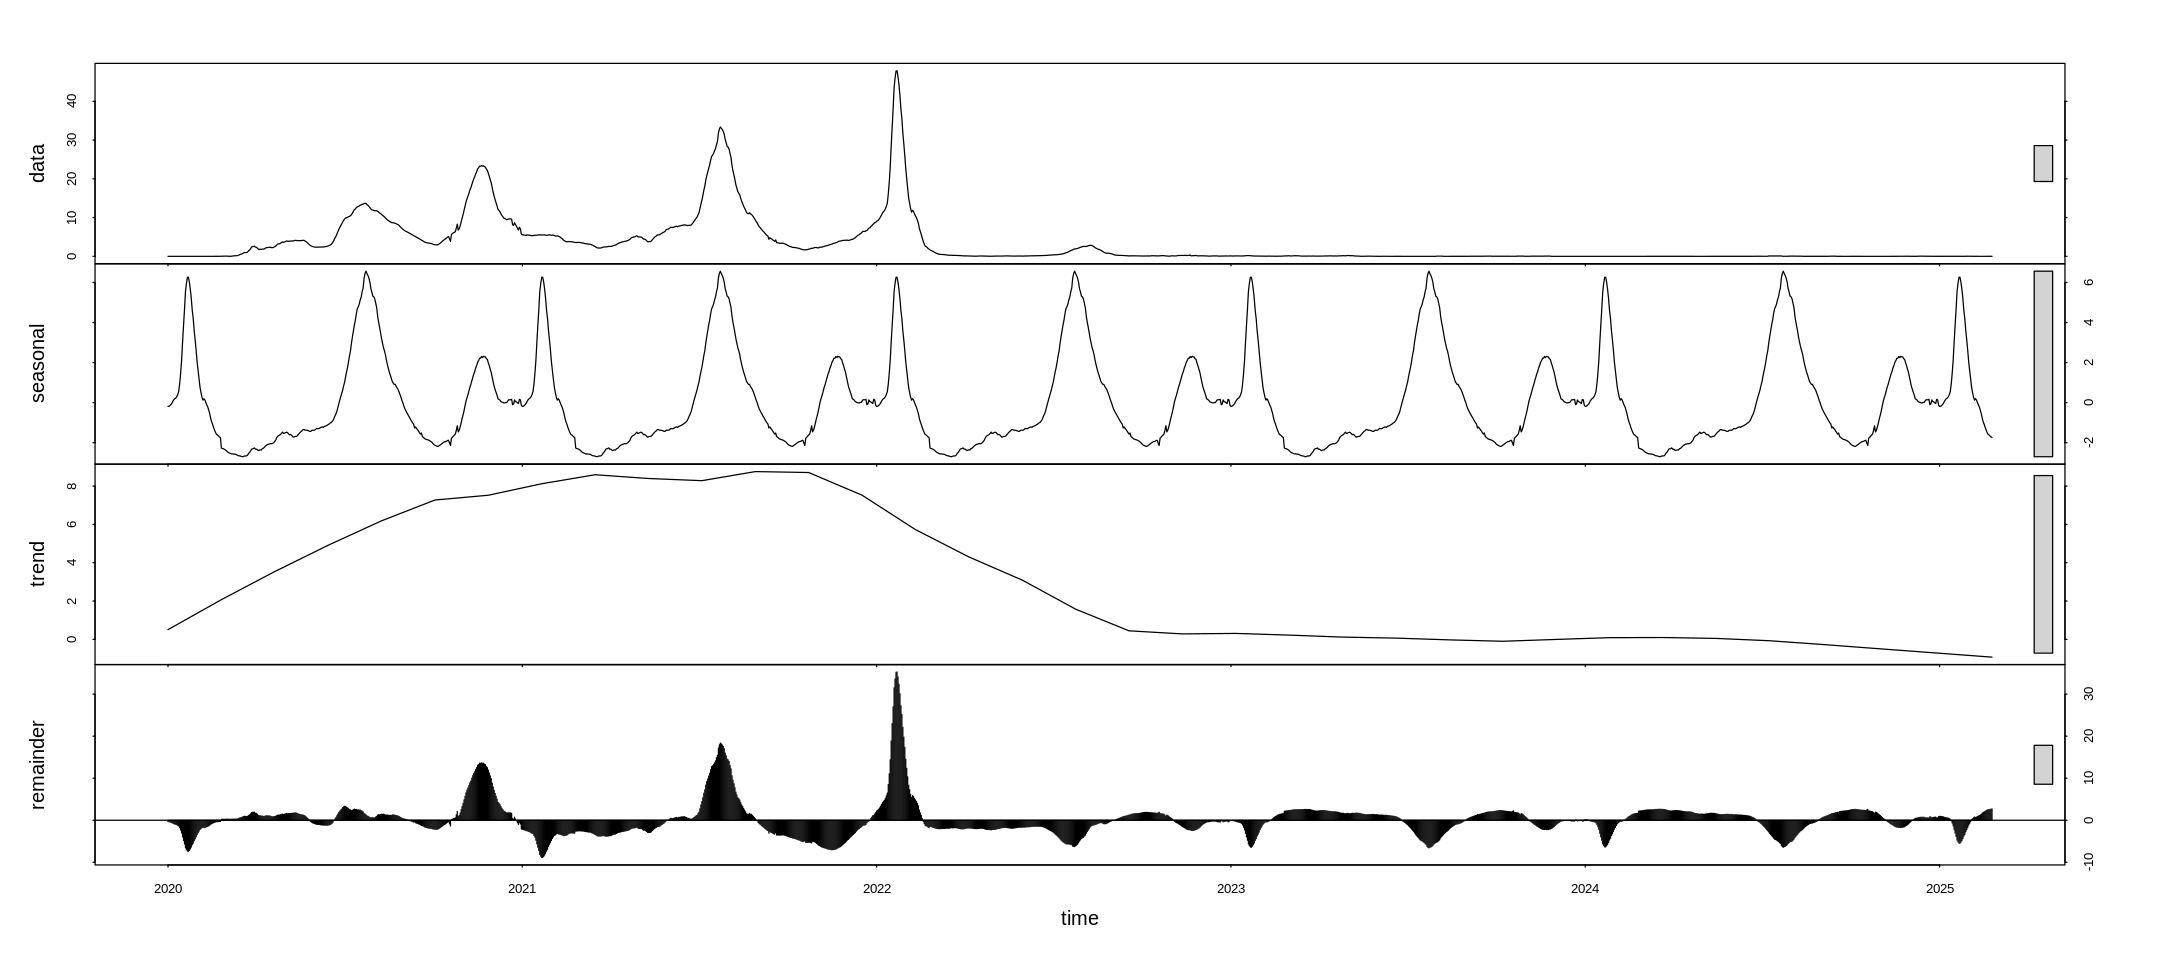

In [300]:
options(repr.plot.width = 18, repr.plot.height = 8)

stl_decomposition <- stl(ts_data, s.window = "periodic")

# Plot STL Decomposition
plot(stl_decomposition)

### 3.4.5 Data (Top Plot) :
- Represents the original time series of cases per million over time.
- Noticeable peaks around 2021 and 2022, followed by a decline in 2023.
- The variations suggest a mix of seasonal and irregular fluctuations.

### 3.4.6 Seasonal Component (Second Plot) :
- Shows periodic fluctuations repeating over time.
- The consistent peaks suggest a strong seasonal pattern, likely annual.
- This could indicate events that cause recurring spikes in cases (e.g., seasonal outbreaks).

 ### 3.4.7 Trend Component (Third Plot) :
- Captures the long-term movement of the data.
- The trend increases until 2022, then declines and stabilizes around 2023–2025.
- This suggests an initial rise in cases, followed by a controlled decrease, possibly due to external interventions or natural trends.

### 3.4.8 Remainder (Bottom Plot) :
- Represents residuals (random noise or unexplained variations).
- Some large spikes suggest unexpected events affecting the data (e.g., sudden outbreaks, policy changes).
- Over time, the residuals seem to stabilize, meaning fewer unpredictable variations after 2023.

## 3.5 Stationarity Checking :
### 3.5.1)  Plot ACF & PACF:

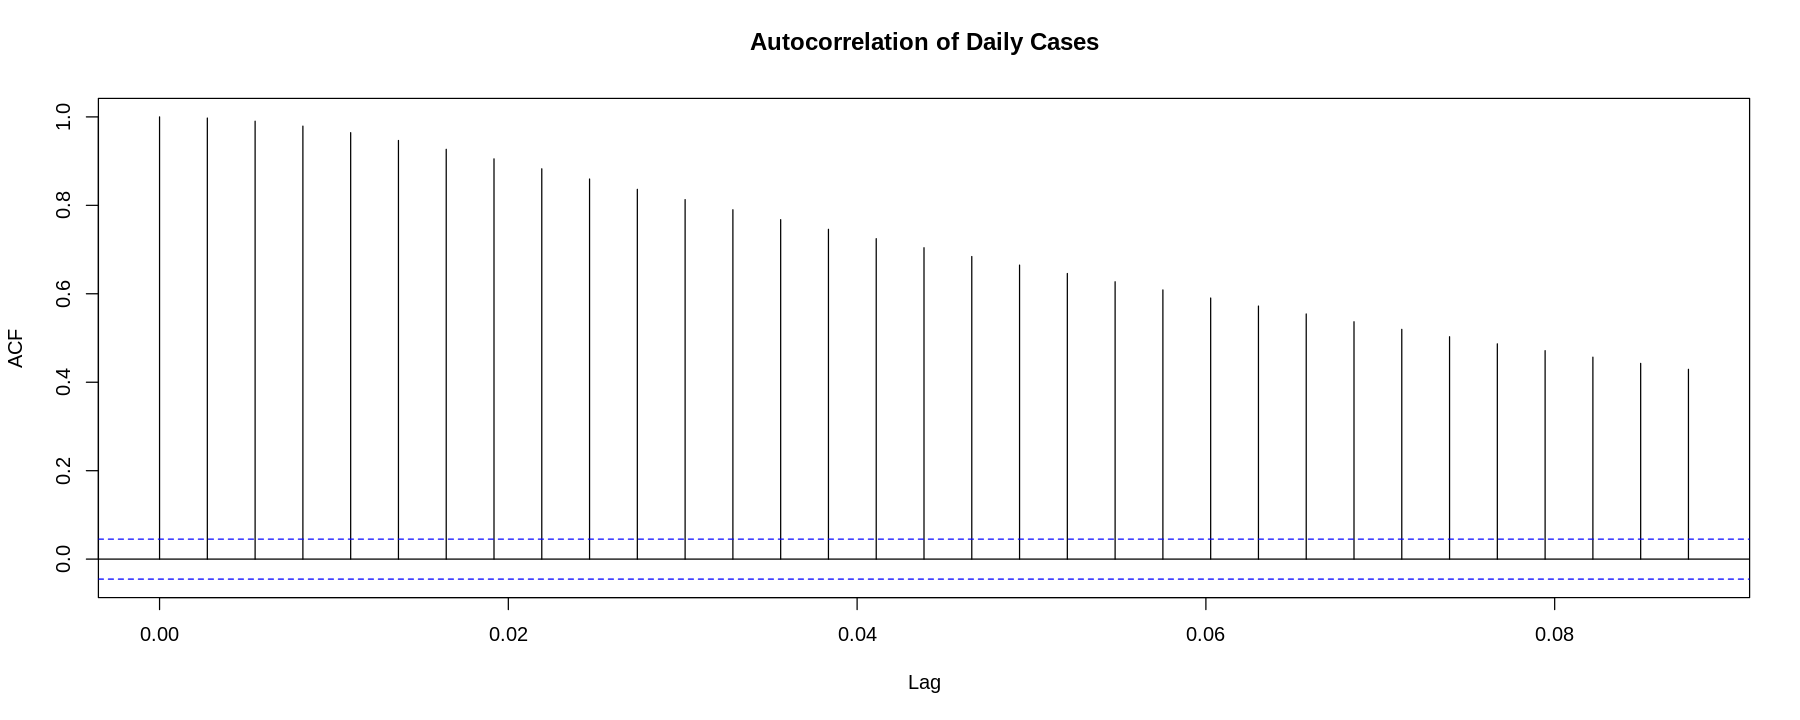

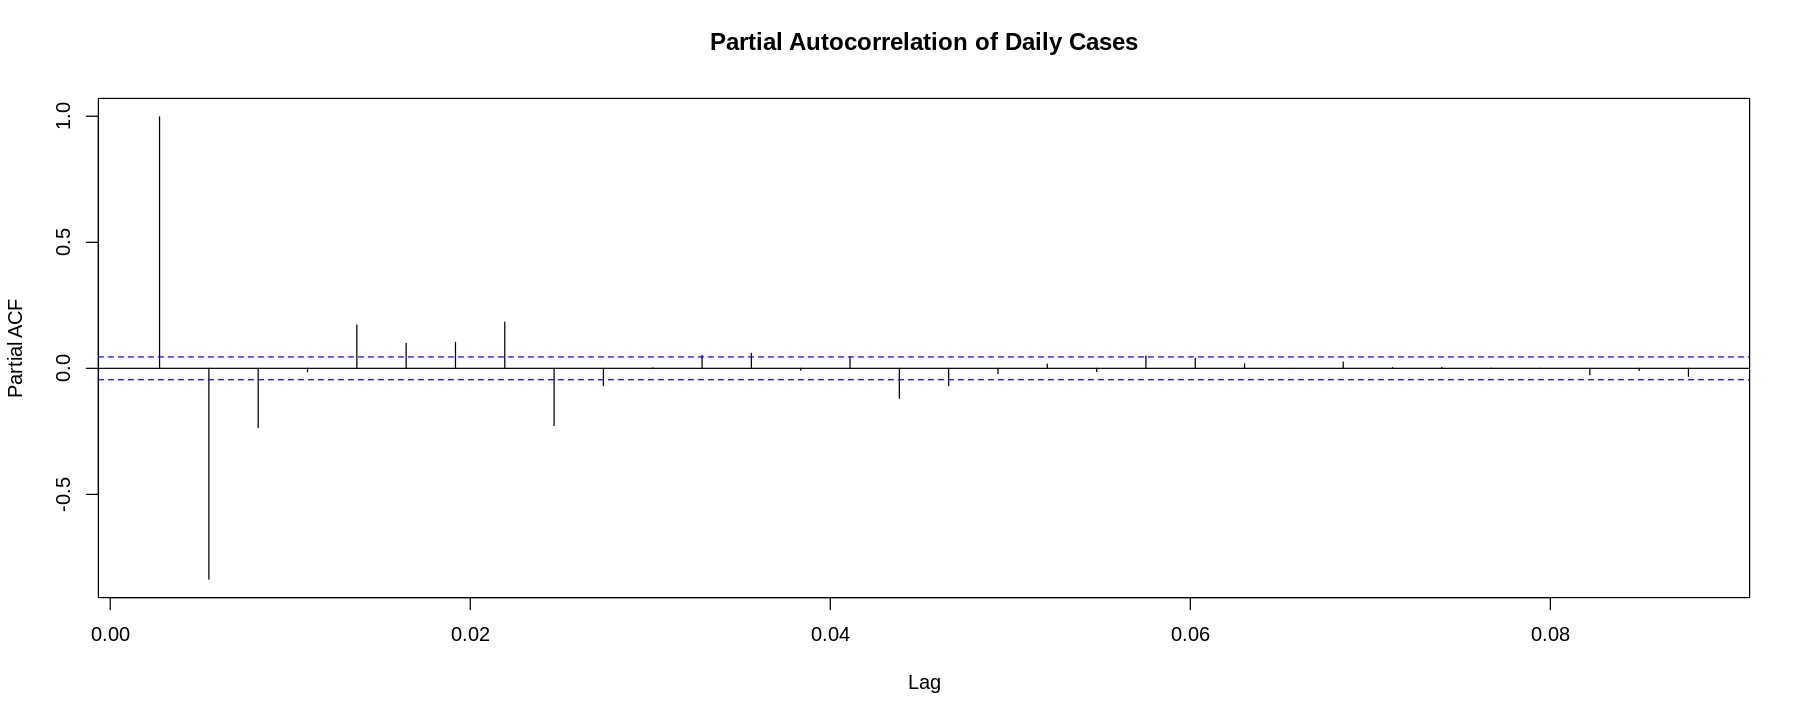

In [323]:
options(repr.plot.width = 15, repr.plot.height = 6)
acf(ts_data, main = "Autocorrelation of Daily Cases")
pacf(ts_data, main = "Partial Autocorrelation of Daily Cases")

**Interpretation of ACF and PACF Plots .**
- **ACF Plot (Top Graph)**
  - Strongly decreasing autocorrelation over time, indicating that the time series is highly dependent on past values.
  - The slow decline suggests non-stationarity.
- **PACF Plot (Bottom Graph)**
  - Significant spike at lag 1 followed by weaker lags.
  - This pattern suggests an **Auto-Regressive (AR)** process.

### 3.5.2) Perform Augmented Dickey-Fuller Test:

In [324]:
adf.test(ts_data)

Warning message in adf.test(ts_data):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -4.7409, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


**Interpretation**
- A very low p-value (≤ 0.05) means we reject the null hypothesis.This suggests that the time series is stationary.
- Dickey-Fuller statistic (-4.7409): More negative values indicate stronger evidence against non-stationarity.

## 3.6 First Differencing

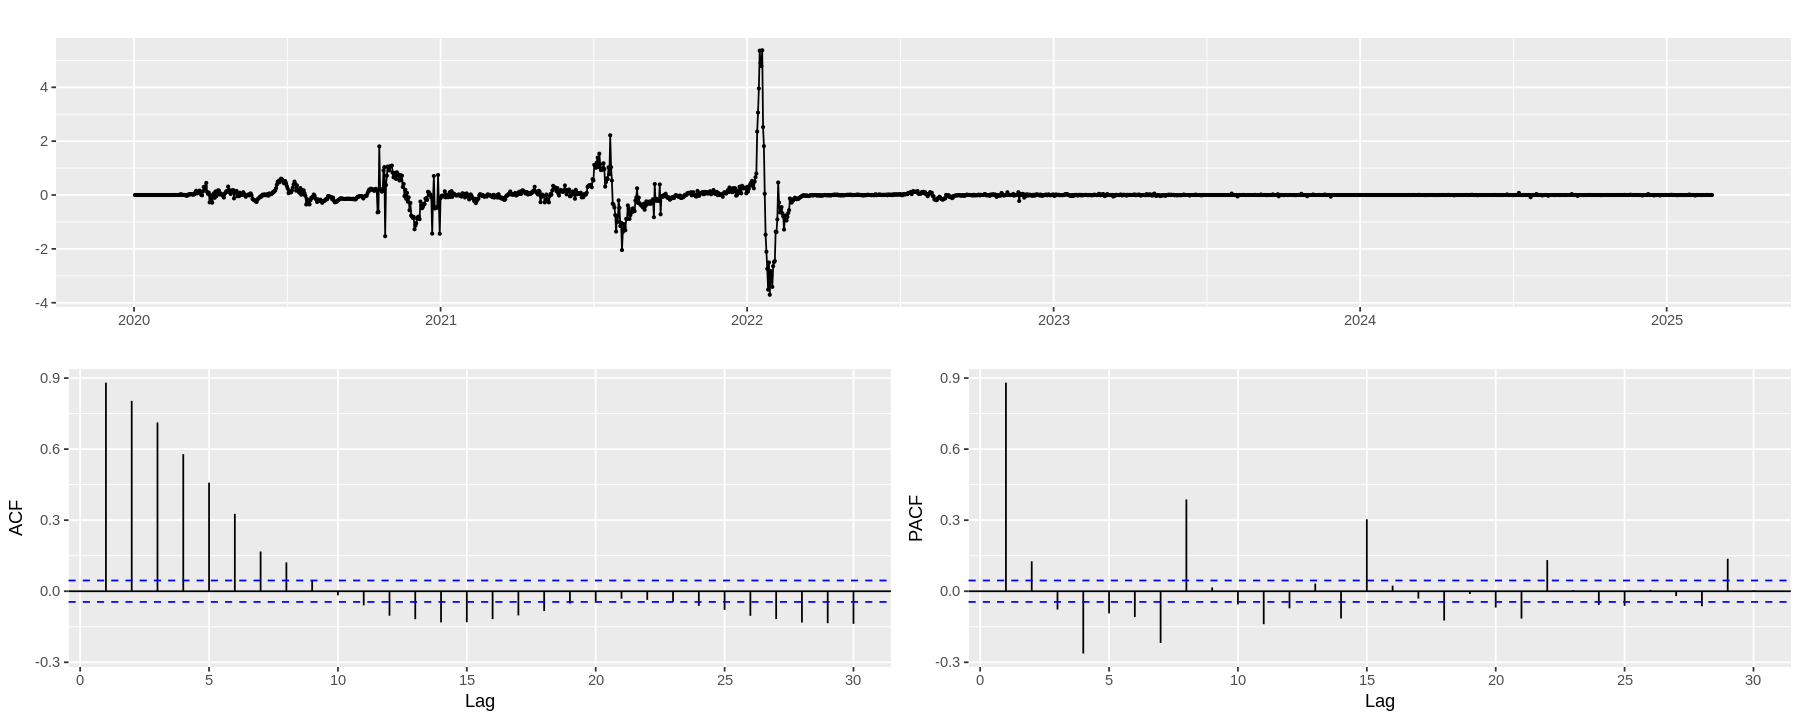

In [303]:
# detrend the data (first order differencing)
first_order_differencing <- diff(ts_data)

# adjust the labels sizes
par(cex.lab = 1.8, cex.main = 1.8)

ggtsdisplay(first_order_differencing, lag.max = 30)

# plot the acf

In [304]:
adf.test(first_order_differencing)


Warning message in adf.test(first_order_differencing):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  first_order_differencing
Dickey-Fuller = -11.06, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


## 3.7 Second Differencing

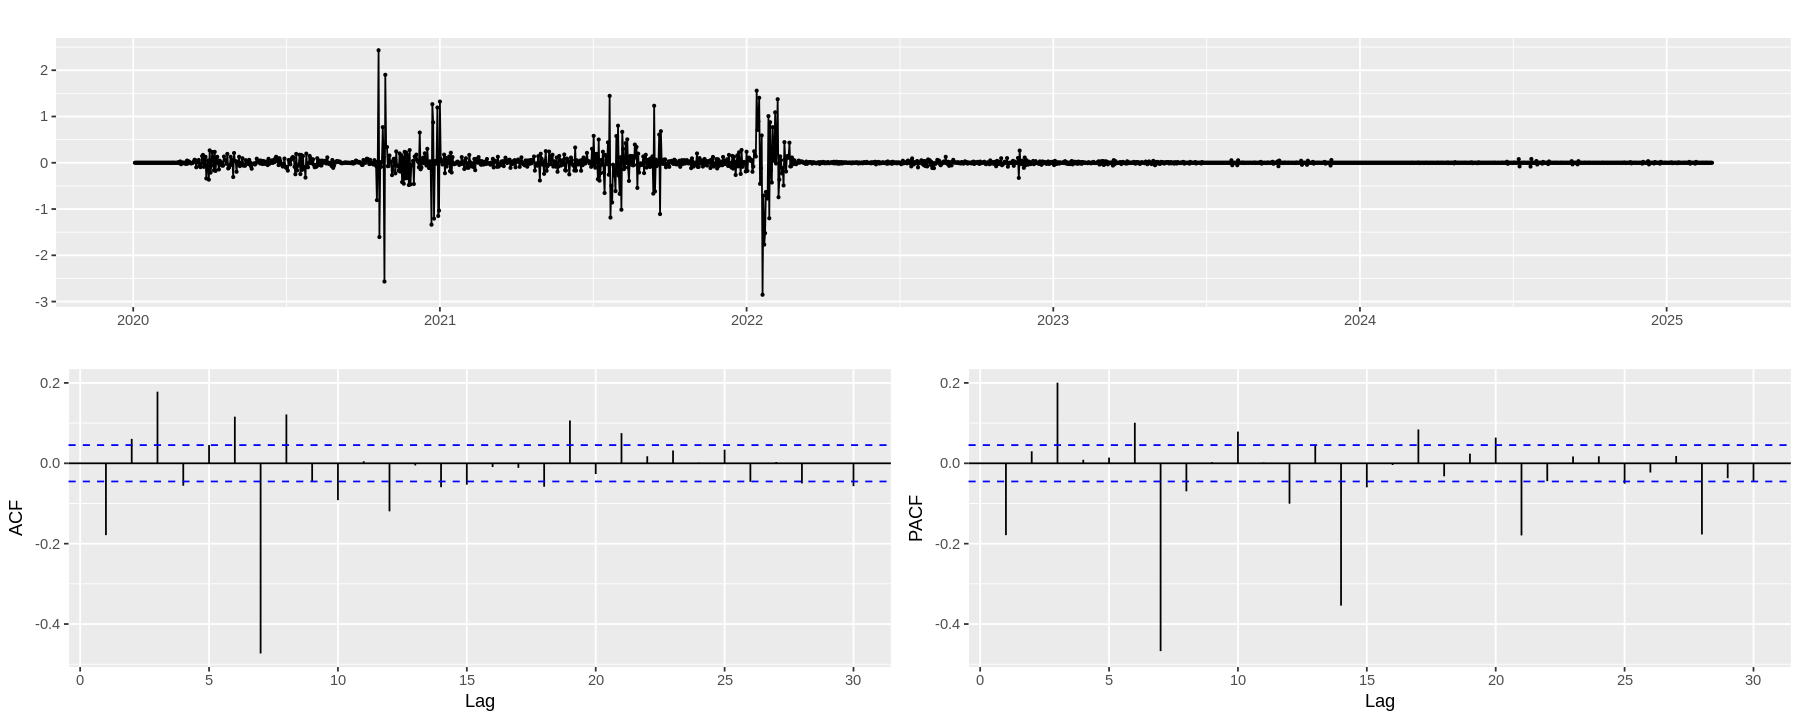

In [305]:
# detrend the data (first order differencing)
second_order_differencing <- diff(first_order_differencing)

# adjust the labels sizes
par(cex.lab = 1.8, cex.main = 1.8)

ggtsdisplay(second_order_differencing, lag.max = 30)

# plot the acf

In [306]:
adf.test(second_order_differencing)

Warning message in adf.test(second_order_differencing):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  second_order_differencing
Dickey-Fuller = -14.091, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


---
# **4. Forcasting and Evaluating the Condidate Models**

## 4.1 Assigning a Train/Test Data:

In [307]:
# Define the split index
train_size <- round(0.95 * length(ts_data))

# Split the data
train_data <- ts_data[1:train_size]    # First 95% for training
test_data  <- ts_data[(train_size + 1):length(ts_data)]  # Remaining 5% for testing

# Print sizes to verify
length(train_data)  # Should be 95% of ts_data
length(test_data)   # Should be 5% of ts_data


[1] 1786

[1] 94

## 4.2 ARIMA Models :

- I have tried so many models even without differencing to confirm that when we difference it makes it better , also I have tried the auto.arima function with the code bellow:

In [308]:
model1 = Arima(train_data, order = c(1,0,1))
model2 = Arima(train_data, order = c(1,0,2))
model3 = Arima(train_data, order = c(2,0,1))
model4 = Arima(train_data, order = c(2,0,2))
model5 = Arima(train_data, order = c(2,1,2))
model6 = Arima(train_data, order = c(2,2,2))
model7 = Arima(train_data, order = c(3,2,2))
model8 = Arima(train_data, order = c(2,2,3))
auto_arima <- auto.arima(train_data)

Series: train_data 
ARIMA(2,1,3) 

Coefficients:
         ar1      ar2      ma1     ma2     ma3
      1.3561  -0.5130  -0.7547  0.3566  0.4293
s.e.  0.0272   0.0261   0.0247  0.0281  0.0258

sigma^2 = 0.0366:  log likelihood = 419.68
AIC=-827.37   AICc=-827.32   BIC=-794.45

Training set error measures:
                        ME      RMSE        MAE MPE MAPE      MASE       ACF1
Training set -2.864282e-06 0.1909837 0.07152486 NaN  Inf 0.4925862 0.03351301

[1] "#######################################################################"

	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)
Q* = 267.3, df = 5, p-value < 2.2e-16

Model df: 5.   Total lags used: 10

[1] "#######################################################################"

AIC: -827.3691 
BIC: -794.446 
[1] "#######################################################################"

Forecast Errors:
RMSE: 0.04506645 
MAE: 0.04329462 
MAPE: Inf %


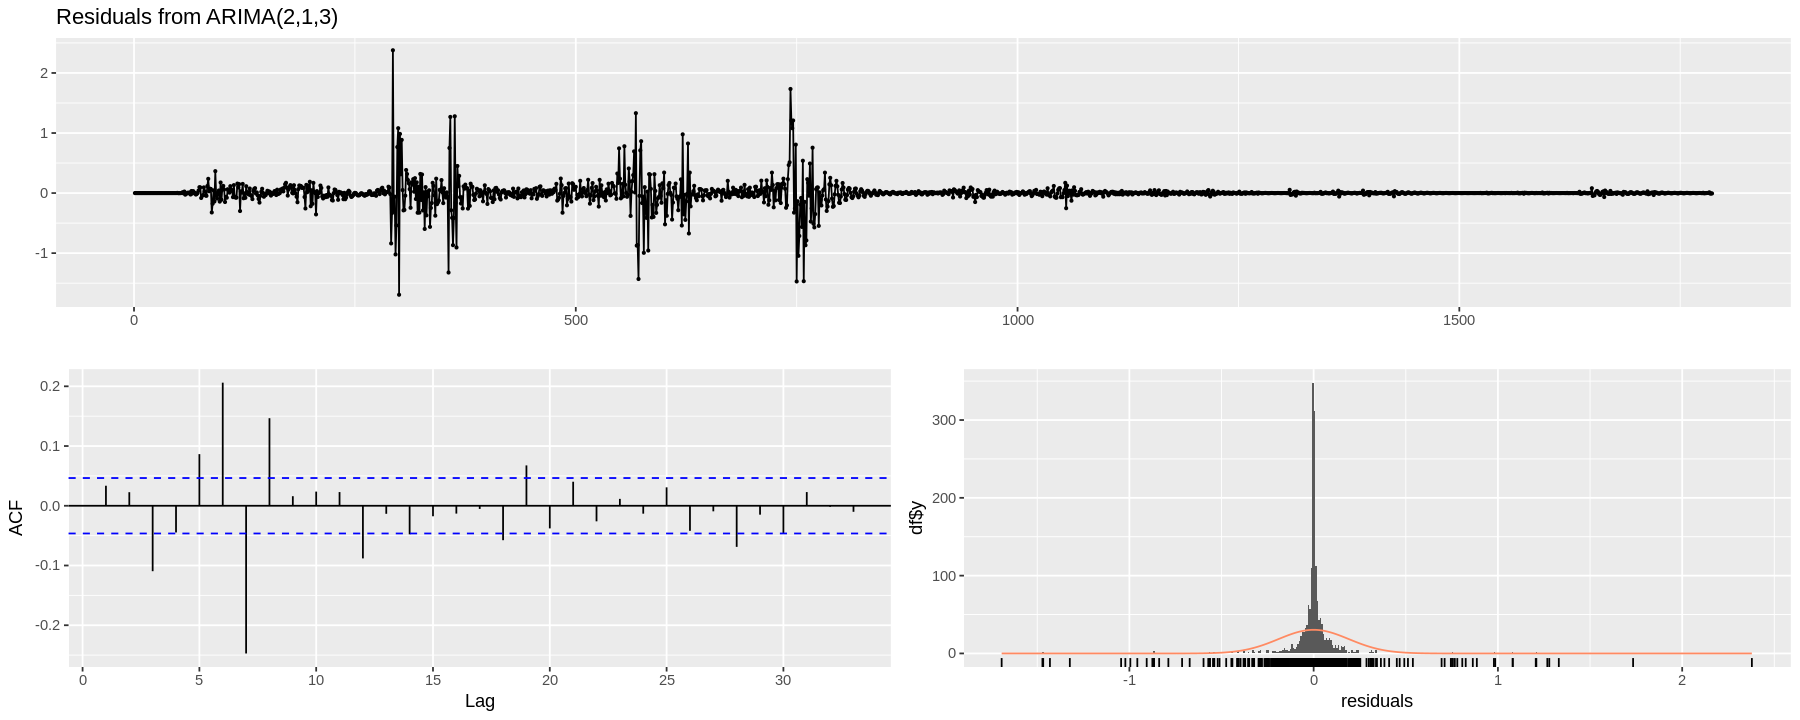

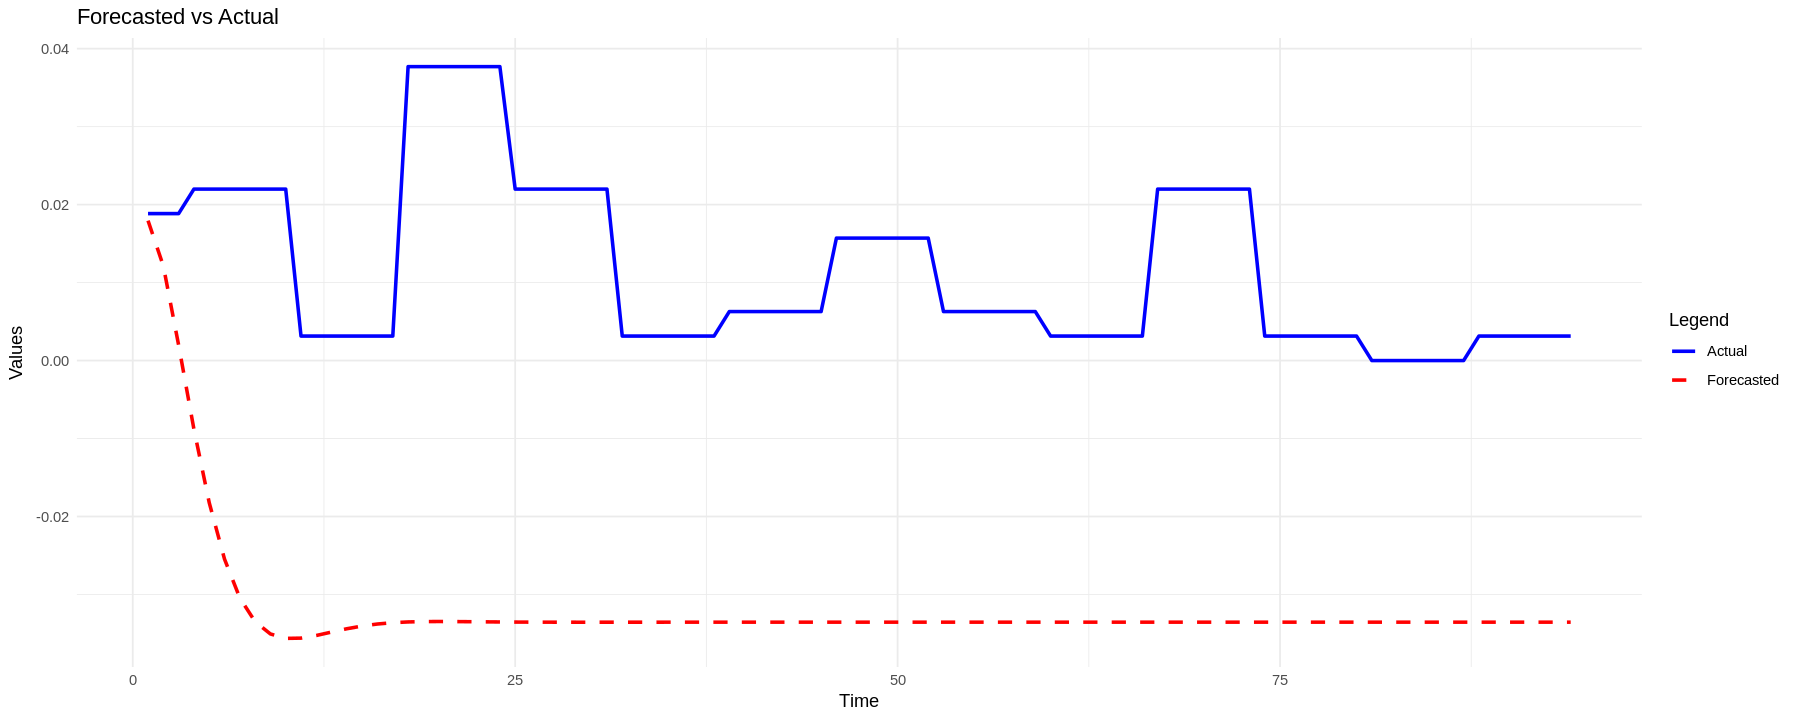

In [309]:
summary(auto_arima)
print("#######################################################################")
checkresiduals(auto_arima)
print("#######################################################################")
aic_value <- AIC(auto_arima)
bic_value <- BIC(auto_arima)
cat("\nAIC:", aic_value, "\nBIC:", bic_value, "\n")
print("#######################################################################")

forecast_values <- forecast(auto_arima, h = length(test_data))
# Compute forecast errors
errors <- test_data - forecast_values$mean
rmse <- sqrt(mean(errors^2, na.rm = TRUE))
mae <- mean(abs(errors), na.rm = TRUE)
mape <- mean(abs(errors / test_data), na.rm = TRUE) * 100

cat("\nForecast Errors:\n")
cat("RMSE:", rmse, "\nMAE:", mae, "\nMAPE:", mape, "%\n")

# Plot forecast
df_plot <- data.frame(
  Date = time(test_data),  # Assuming test_data is a time series
  Actual = as.numeric(test_data),
  Forecasted = as.numeric(forecast_values$mean)
)

# Plot with different colors for Actual and Forecasted values
ggplot(df_plot, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual"), linewidth = 1) +
  geom_line(aes(y = Forecasted, color = "Forecasted"), linewidth = 1, linetype = "dashed") +
  labs(title = "Forecasted vs Actual",
       x = "Time",
       y = "Values",
       color = "Legend") +  # Legend title
  theme_minimal() +
  scale_color_manual(values = c("Actual" = "blue", "Forecasted" = "red"))

## 4.2.1 Summary of ARIMA models:
- Among the ARIMA models, the best choice is ARIMA(2,1,3) based on the following criteria:

- Lowest AIC (-827.3691): Indicates the best trade-off between model fit and complexity.

- Lowest BIC (-794.446): Suggests the model is well-optimized while avoiding overfitting.

- Low RMSE (0.04507) and MAE (0.04329): Suggests strong predictive performance.

- Residual ACF1 (0.0088): Shows minimal autocorrelation in residuals, meaning errors are not strongly dependent.

- While ARIMA(3,2,2) has a lower RMSE and MAE, it has a much higher BIC and a less favorable AIC compared to ARIMA(2,1,3).

- Thus, the best ARIMA model is ARIMA(2,1,3).

| Model             | AIC       | BIC       | RMSE   | MAE    | Residual ACF1  |
|------------------|----------|----------|--------|--------|---------------|
| **ARIMA(1,0,1)**  | -521.12  | -495.48  | 0.6077126  | 0.53049  | 0.0193  |
| **ARIMA(1,0,2)**  | 382.0902   | 409.7853  | 0.7661156 | 0.6717493 | 0.0117  |
| **ARIMA(2,0,1)**  | -512.5439   | -485.1052  | 2.946355  | 2.728879 | 0.0095  |
| **ARIMA(2,0,2)**  | -545.974  | -513.0476  | 2.85028 | 2.635311 | 0.0057  |
| **ARIMA(2,1,2)**  | -659.9445  | -632.5086  | 0.01985371 | 0.01667277 | -0.0089  |
| **ARIMA(2,2,2)**  | -754.5957  | -727.1626  | 0.155447 | 0.1347541 | 0.0169  |
| **ARIMA(3,2,2)**  | -591.8156   | -591.8156  | 0.01370638 | 0.00907632 | 0.0001  |
| **ARIMA(2,2,3)**  | -753.0078  | -720.0881  | 0.148935 | 0.1291728 | 0. 033  |
| **ARIMA(2,1,3)**  | -827.3691  | -794.446  | 0.04506645   | 0.04329462 | 0.0088  |


## 4.3 SARIMA Models :

- I have tried so many models, also I have tried the seasonal auto.arima function with the code bellow **(you could choose any model you want)** :

In [310]:
auto_sarima <- auto.arima(train_data, seasonal = TRUE, stepwise = FALSE, approximation = FALSE)
# Fit different SARIMA models with correct seasonal specification
sarima_1 <- Arima(train_data, order = c(5,1,1), seasonal = list(order = c(1,1,1), period = 7))
sarima_2 <- Arima(train_data, order = c(2,1,2), seasonal = list(order = c(0,1,1), period = 7))
sarima_3 <- Arima(train_data, order = c(3,1,3), seasonal = list(order = c(1,1,1), period = 7))
sarima_4 <- Arima(train_data, order = c(2,2,2), seasonal = list(order = c(1,1,1), period = 7))
sarima_5 <- Arima(train_data, order = c(1,1,1), seasonal = list(order = c(1,1,1), period = 7))

Series: train_data 
ARIMA(2,1,3) 

Coefficients:
         ar1      ar2      ma1     ma2     ma3
      1.3561  -0.5130  -0.7547  0.3566  0.4293
s.e.  0.0272   0.0261   0.0247  0.0281  0.0258

sigma^2 = 0.0366:  log likelihood = 419.68
AIC=-827.37   AICc=-827.32   BIC=-794.45

Training set error measures:
                        ME      RMSE        MAE MPE MAPE      MASE       ACF1
Training set -2.864282e-06 0.1909837 0.07152486 NaN  Inf 0.4925862 0.03351301

[1] "#######################################################################"

	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)
Q* = 267.3, df = 5, p-value < 2.2e-16

Model df: 5.   Total lags used: 10

[1] "#######################################################################"

AIC: -827.3691 
BIC: -794.446 
[1] "#######################################################################"

Forecast Errors:
RMSE: 0.04506645 
MAE: 0.04329462 
MAPE: Inf %


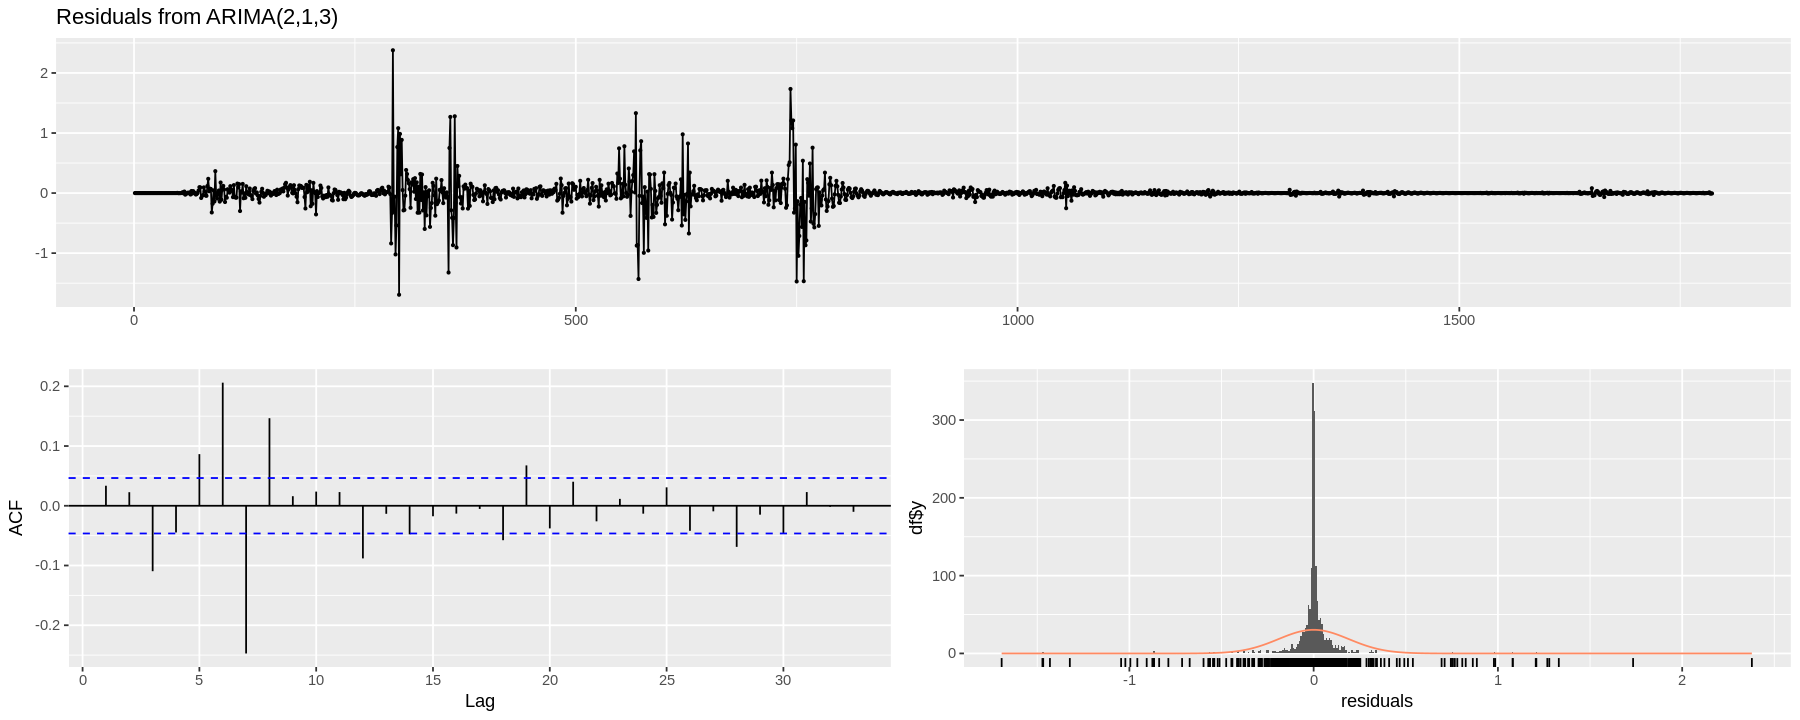

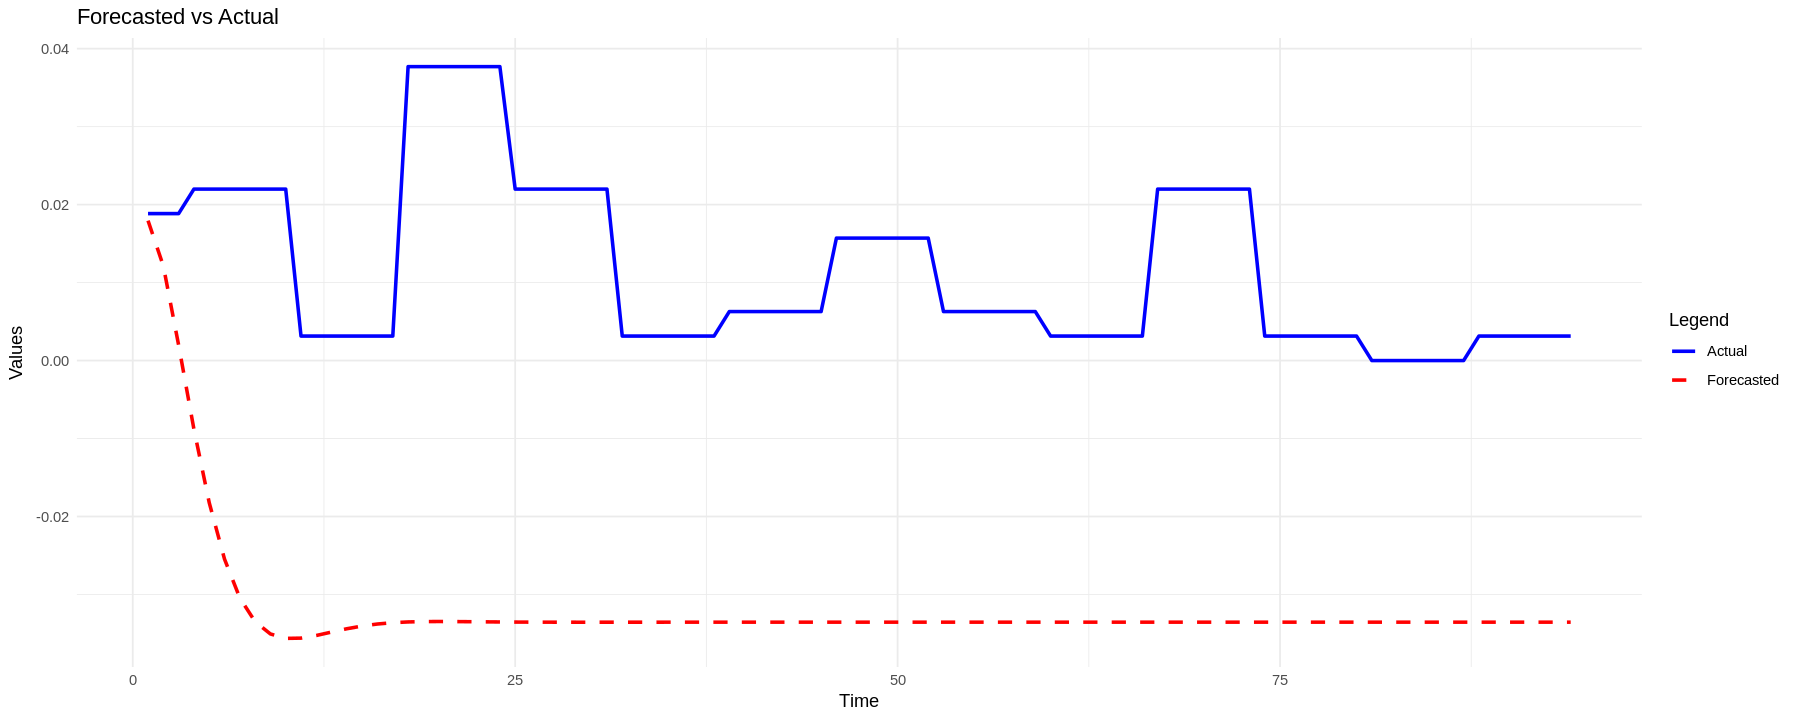

In [311]:
# Check summary
summary(auto_sarima)
print("#######################################################################")
checkresiduals(auto_sarima)
print("#######################################################################")

# Get AIC and BIC
aic_value <- AIC(auto_sarima)
bic_value <- BIC(auto_sarima)
cat("\nAIC:", aic_value, "\nBIC:", bic_value, "\n")
print("#######################################################################")

# Forecast and compute errors
forecast_values <- forecast(auto_sarima, h = length(test_data))
errors <- test_data - forecast_values$mean
rmse <- sqrt(mean(errors^2, na.rm = TRUE))
mae <- mean(abs(errors), na.rm = TRUE)
mape <- mean(abs(errors / test_data), na.rm = TRUE) * 100

cat("\nForecast Errors:\n")
cat("RMSE:", rmse, "\nMAE:", mae, "\nMAPE:", mape, "%\n")

# Plot forecast
df_plot <- data.frame(
  Date = time(test_data),  # Assuming test_data is a time series
  Actual = as.numeric(test_data),
  Forecasted = as.numeric(forecast_values$mean)
)

# Plot with different colors for Actual and Forecasted values
ggplot(df_plot, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual"), linewidth = 1) +
  geom_line(aes(y = Forecasted, color = "Forecasted"), linewidth = 1, linetype = "dashed") +
  labs(title = "Forecasted vs Actual",
       x = "Time",
       y = "Values",
       color = "Legend") +  # Legend title
  theme_minimal() +
  scale_color_manual(values = c("Actual" = "blue", "Forecasted" = "red"))

## 4.3.1 Summary of SARIMA models:
- Shows that **ARIMA(5,1,1)(1,1,1)[7]**  is the best model until now in SARIMA

| Model                        | AIC       | BIC       | RMSE    | MAE     | Residual ACF1  |
|------------------------------|-----------|-----------|---------|---------|---------------|
| ARIMA(2,1,3) (auto.arima)    | -827.3691   | -794.446   | 0.04506645  | 0.04329462  | 0.0335        |
| SARIMA(1,1,1)(1,1,1)[7]      | -814.9568   | -787.5406   | 0.01184542  | 0.01053811  | -0.0132       |
| SARIMA(2,1,2)(0,1,1)[7]      | -608.8395   | -575.94   | 0.01968651   | 0.01649869  | 0.0725        |
| SARIMA(3,1,3)(1,1,1)[7]      | -956.3392  | -906.99  | 0.01144858  | 0.01023734  | -0.0018       |
| ARIMA(2,2,2)(1,1,1)[7]       | -973.2462  | -934.8674  | 0.05417564  | 0.04723321 |-0.0343  |
| **ARIMA(5,1,1)(1,1,1)[7]**   | **-979.9192** | **-930.57** | **0.03048012** | **0.02825093** | -0.0149 |


## 4.4 Linear Regression for Time Series

In [312]:
time_index <- 1:length(train_data)
lm_model <- lm(train_data ~ time_index)



Call:
lm(formula = train_data ~ time_index)

Residuals:
   Min     1Q Median     3Q    Max 
-7.890 -2.434 -1.061  0.509 43.812 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.8950628  0.2700065   29.24   <2e-16 ***
time_index  -0.0050857  0.0002617  -19.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.703 on 1784 degrees of freedom
Multiple R-squared:  0.1747,	Adjusted R-squared:  0.1742 
F-statistic: 377.5 on 1 and 1784 DF,  p-value: < 2.2e-16


[1] "#######################################################################"



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 1781.2, df = 10, p-value < 2.2e-16


[1] "#######################################################################"

AIC: 11291.27 
BIC: 11307.73 
[1] "#######################################################################"

Forecast Errors:
RMSE: 1.447263 
MAE: 1.441158 
MAPE: Inf %


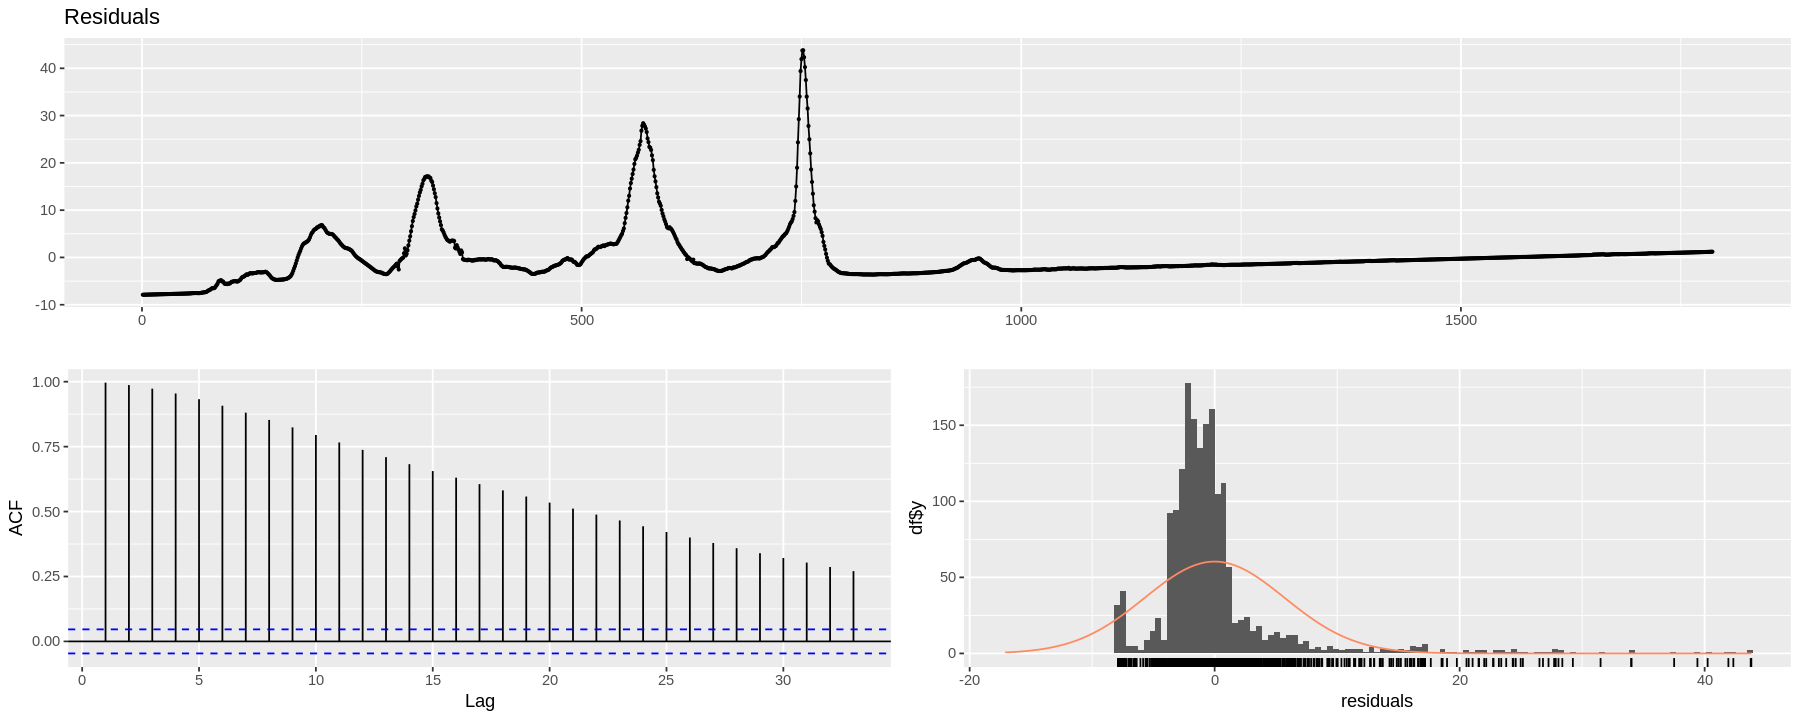

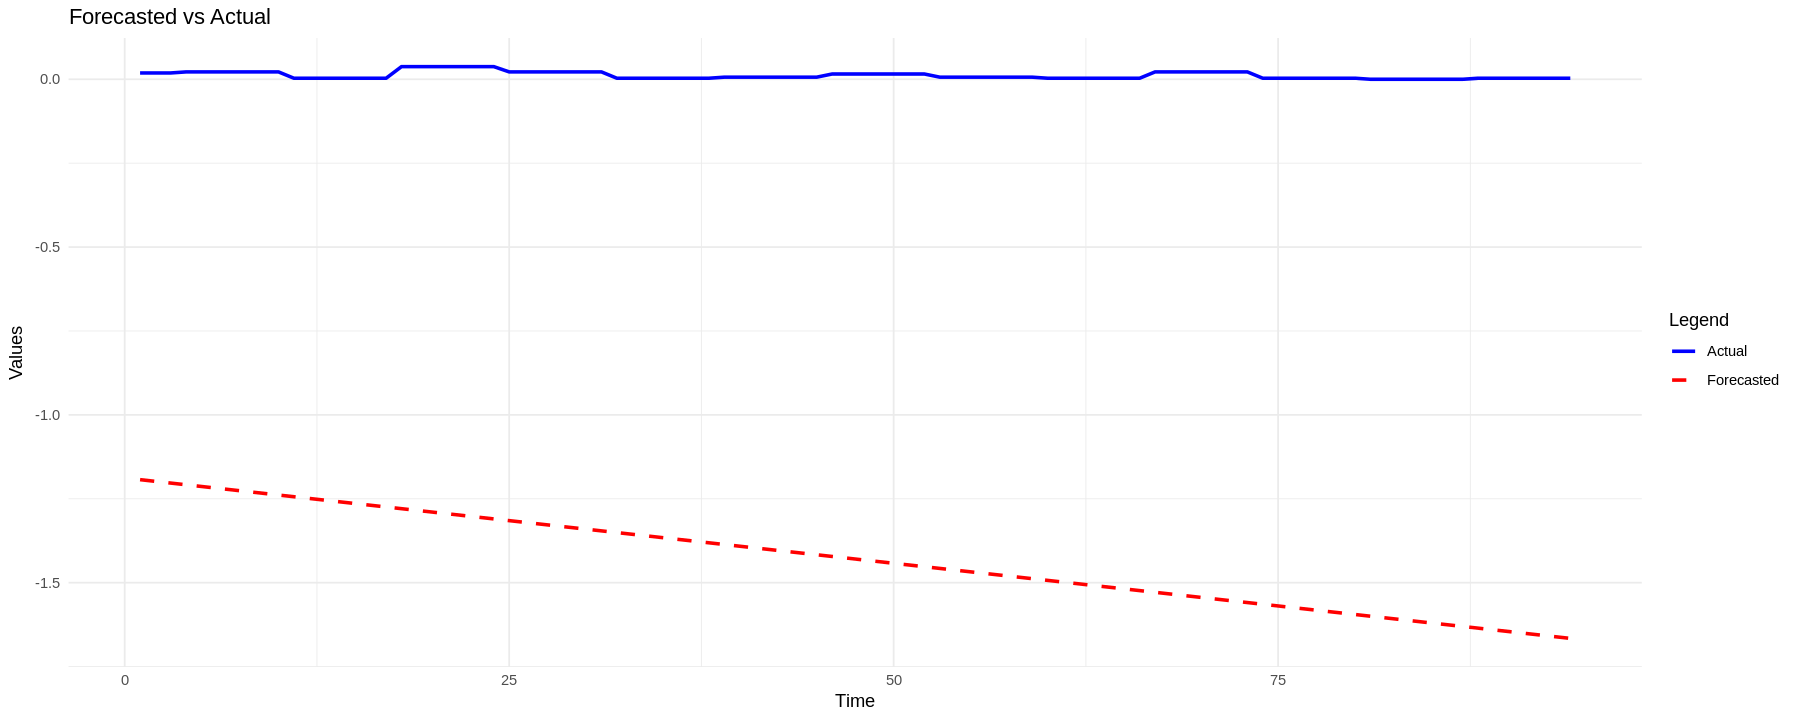

In [313]:
summary(lm_model)
print("#######################################################################")
checkresiduals(lm_model)
print("#######################################################################")

# Get AIC and BIC
aic_value <- AIC(lm_model)
bic_value <- BIC(lm_model)
cat("\nAIC:", aic_value, "\nBIC:", bic_value, "\n")
print("#######################################################################")
# Create future time index
future_time_index <- data.frame(time_index = seq(max(time_index) + 1,
                                                 max(time_index) + length(test_data)))

# Forecast using the regression model
forecast_values <- predict(lm_model, newdata = future_time_index)

# Compute errors
errors <- test_data - forecast_values
rmse <- sqrt(mean(errors^2, na.rm = TRUE))
mae <- mean(abs(errors), na.rm = TRUE)
mape <- mean(abs(errors / test_data), na.rm = TRUE) * 100

# Print errors
cat("\nForecast Errors:\n")
cat("RMSE:", rmse, "\nMAE:", mae, "\nMAPE:", mape, "%\n")

# Create dataframe for plotting
df_plot <- data.frame(
  Date = time(test_data),  # Assuming test_data is a time series
  Actual = as.numeric(test_data),
  Forecasted = as.numeric(forecast_values)  # Fix here
)

# Plot with different colors for Actual and Forecasted values
ggplot(df_plot, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual"), linewidth = 1) +
  geom_line(aes(y = Forecasted, color = "Forecasted"), linewidth = 1, linetype = "dashed") +
  labs(title = "Forecasted vs Actual",
       x = "Time",
       y = "Values",
       color = "Legend") +  # Legend title
  theme_minimal() +
  scale_color_manual(values = c("Actual" = "blue", "Forecasted" = "red"))

## 4.4.1 Summary of linear Regression models:
- Shows that **linear Regression model**  is the not good

---
# 5. Conclusion : Best Overall Model: ARIMA(5,1,1)(1,1,1)[7]
- Lowest AIC (-979.9192): Indicates the best trade-off between model complexity and fit.

- Low BIC (-930.57): Suggests a good balance between model complexity and data fit.

- Low RMSE (0.03048) and Low MAE (0.02825): Suggests strong predictive accuracy.

- Residual ACF1 (-0.0149): Indicates minimal autocorrelation in residuals, meaning the errors are not highly dependent, which is desirable.**bold text**

---
# 6. Diagnosis of the Best Model :

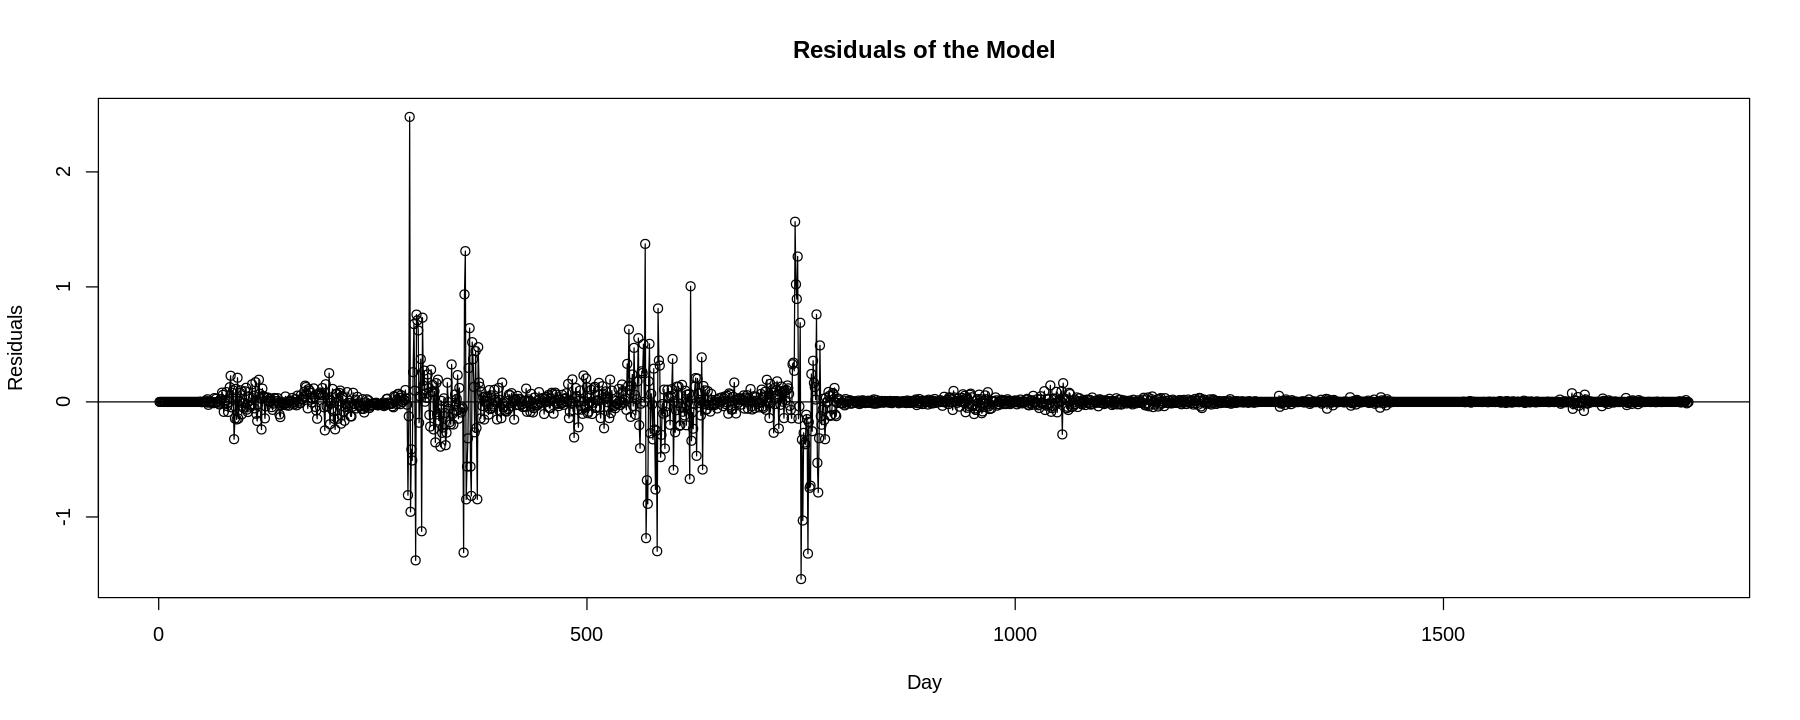

In [314]:
best_model = Arima(train_data, order = c(5,1,1), seasonal = list(order = c(1,1,1), period = 7))


plot(residuals(best_model), ylab = "Residuals", main = "Residuals of the Model", xlab = "Day", type = "o")
abline(h = 0)

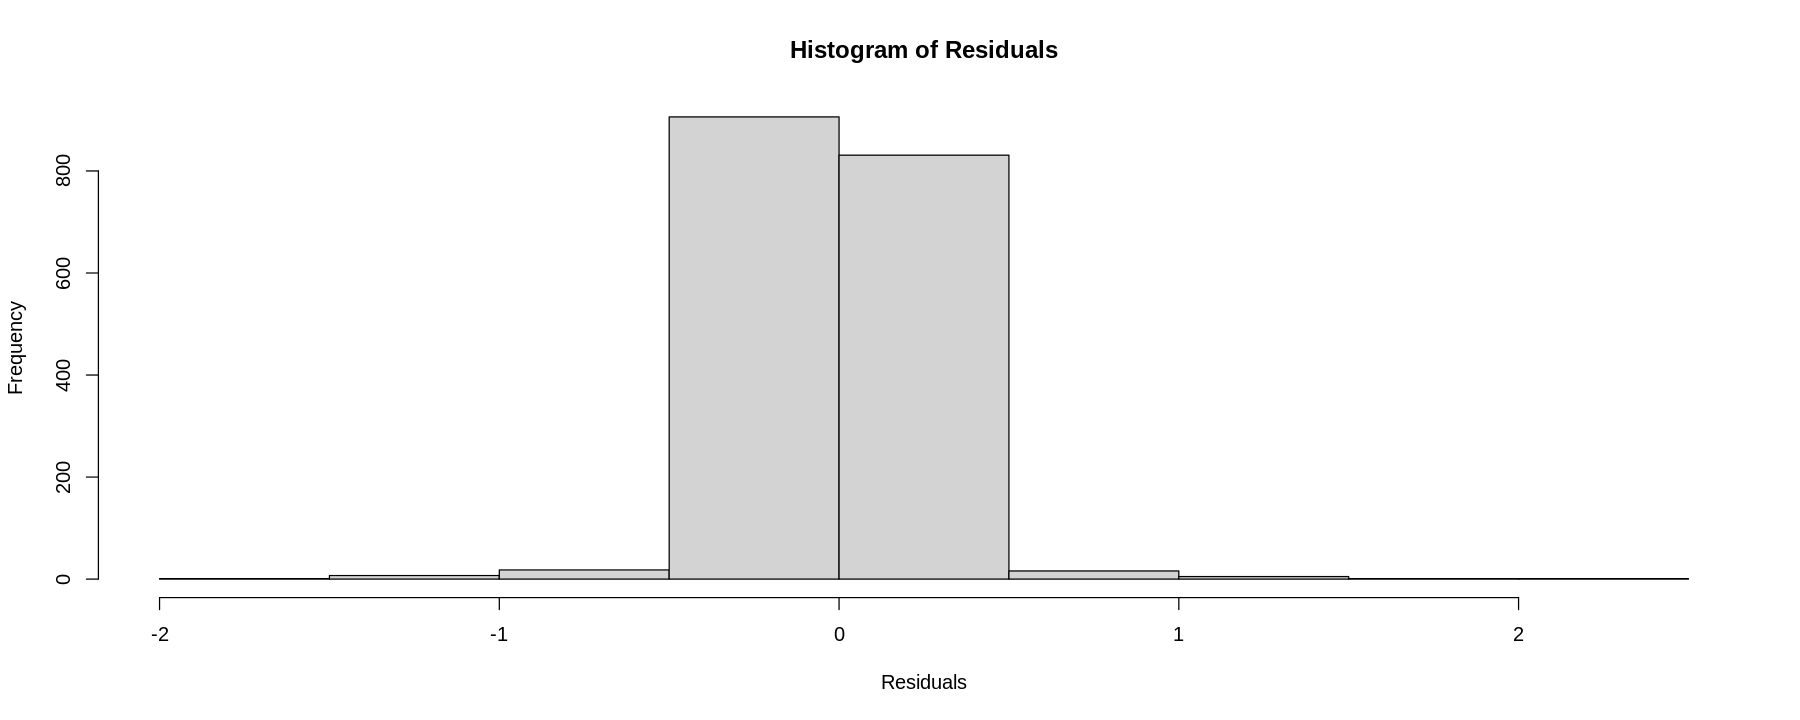

In [315]:
hist(residuals(best_model), main = "Histogram of Residuals", xlab = "Residuals")


## **Interpretation :** Doesn't have the bell shape of Normal Distribution

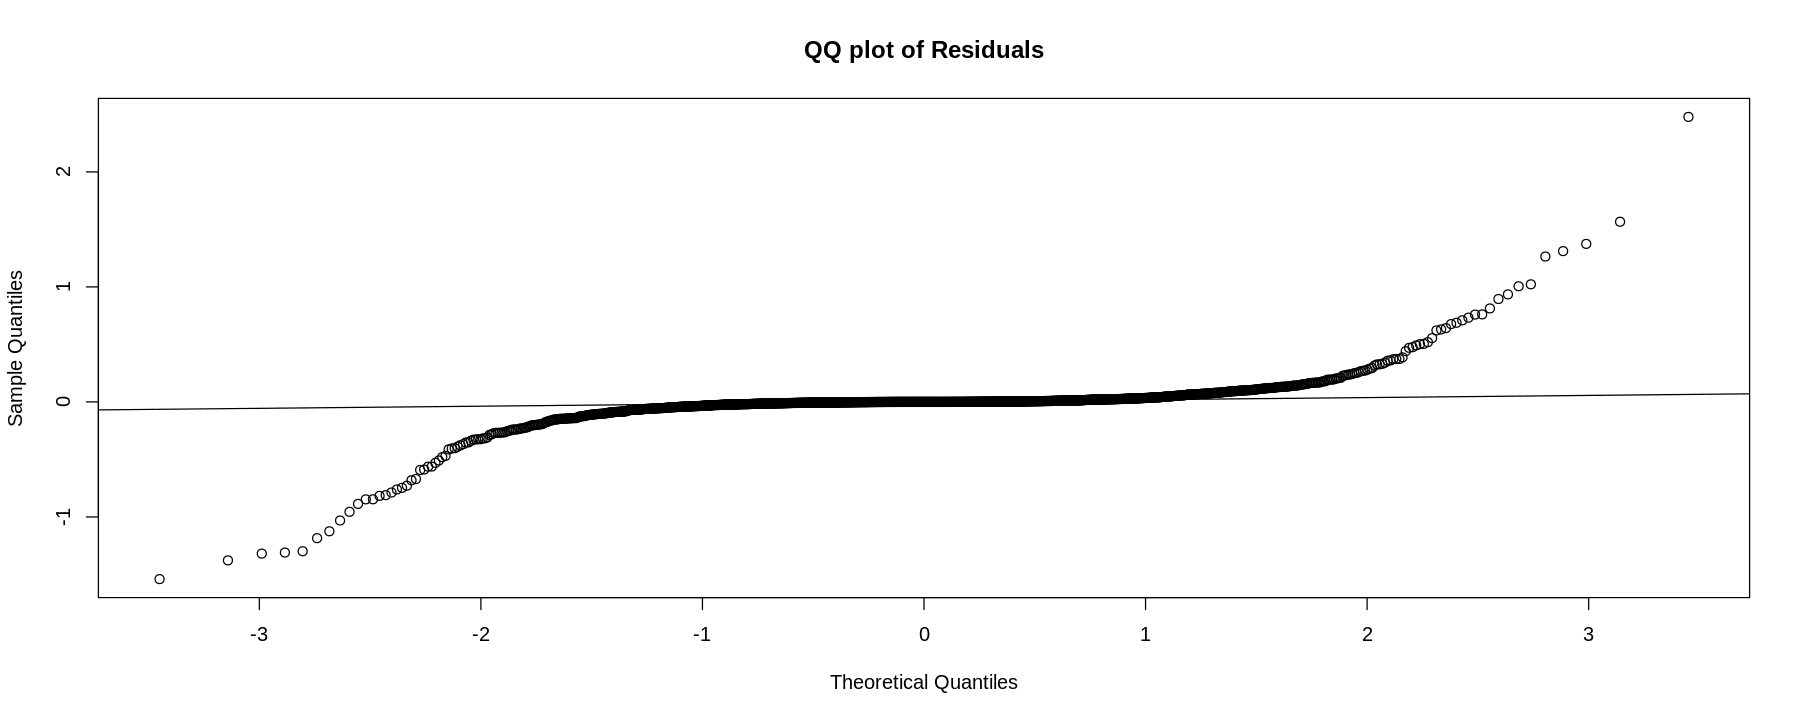

In [316]:
qqnorm(residuals(best_model), main = "QQ plot of Residuals")
qqline(residuals(best_model))

## **Interpretation :** Doesn't Look like the line y=x (not normal distribution)

In [317]:
shapiro.test(residuals(best_model)) # normality


	Shapiro-Wilk normality test

data:  residuals(best_model)
W = 0.49573, p-value < 2.2e-16


## **Interpretation :** The model's residuals are significantly non-normal p-value < 0.05

In [318]:
Box.test(residuals(best_model))


	Box-Pierce test

data:  residuals(best_model)
X-squared = 0.39416, df = 1, p-value = 0.5301


## **Interpretation :** p-value is high > 0.05, there is no significant autocorrelation in the residuals, model has successfully captured the time-dependent patterns in the data

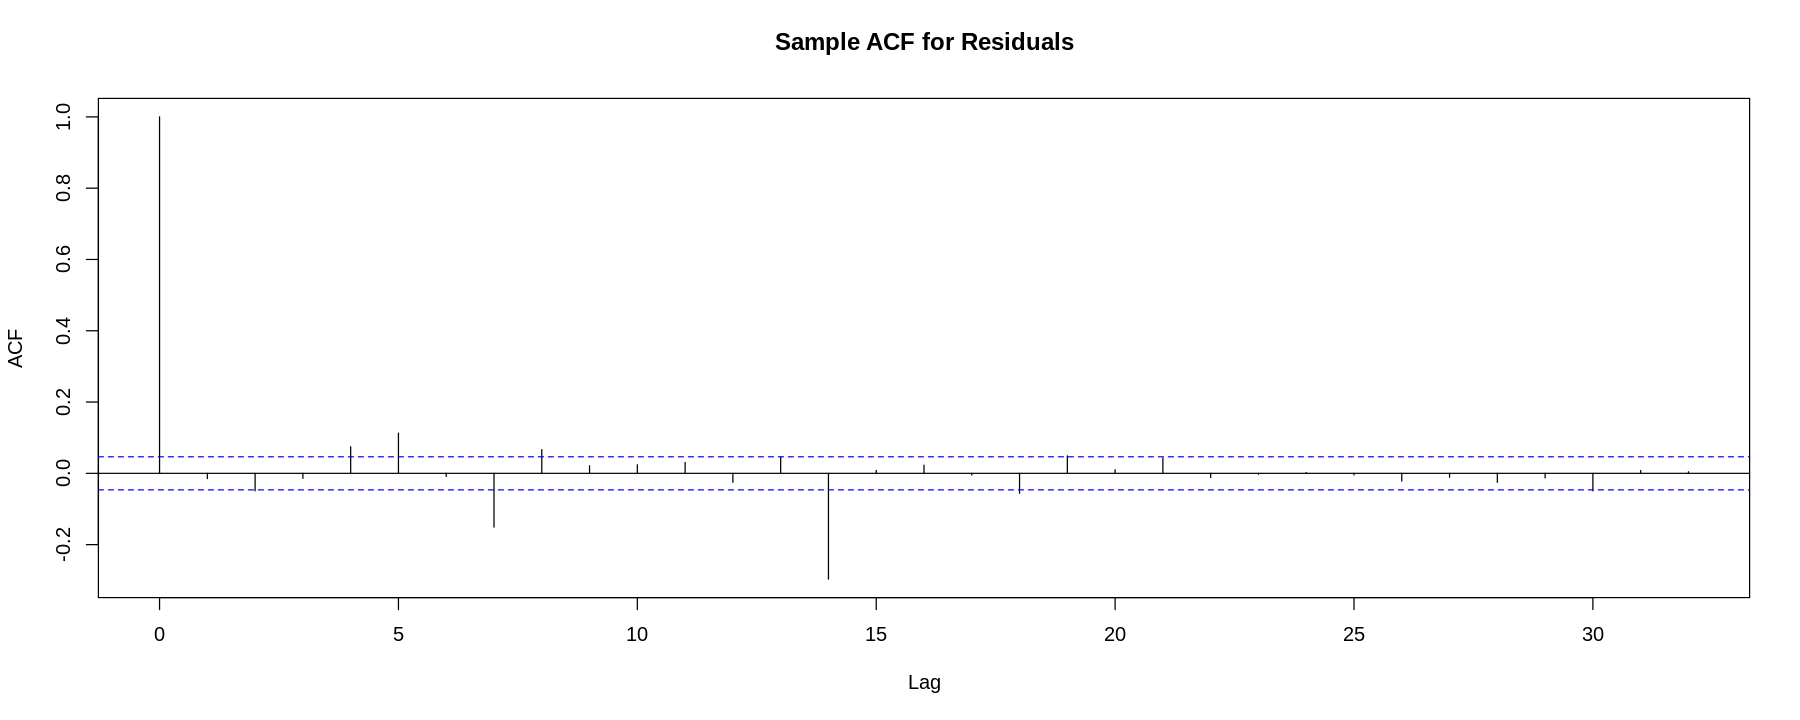

In [319]:
acf(residuals(best_model), main = "Sample ACF for Residuals")


In [320]:

# Convert residuals to a sequence of signs (+1 for positive, -1 for negative)
sign_residuals <- factor(ifelse(residuals(best_model) > 0, 1, -1))

# Perform Runs Test
runs_test_result <- runs.test(sign_residuals)

# Display the result
print(runs_test_result)



	Runs Test

data:  sign_residuals
Standard Normal = 1.6811, p-value = 0.09274
alternative hypothesis: two.sided



## **Interpretation :** Since the p-value is extremely (> 0.05) The residuals are randomly distributed!


Forecast Errors:
RMSE: 0.03048012 
MAE: 0.02825093 
MAPE: 403.4776 %


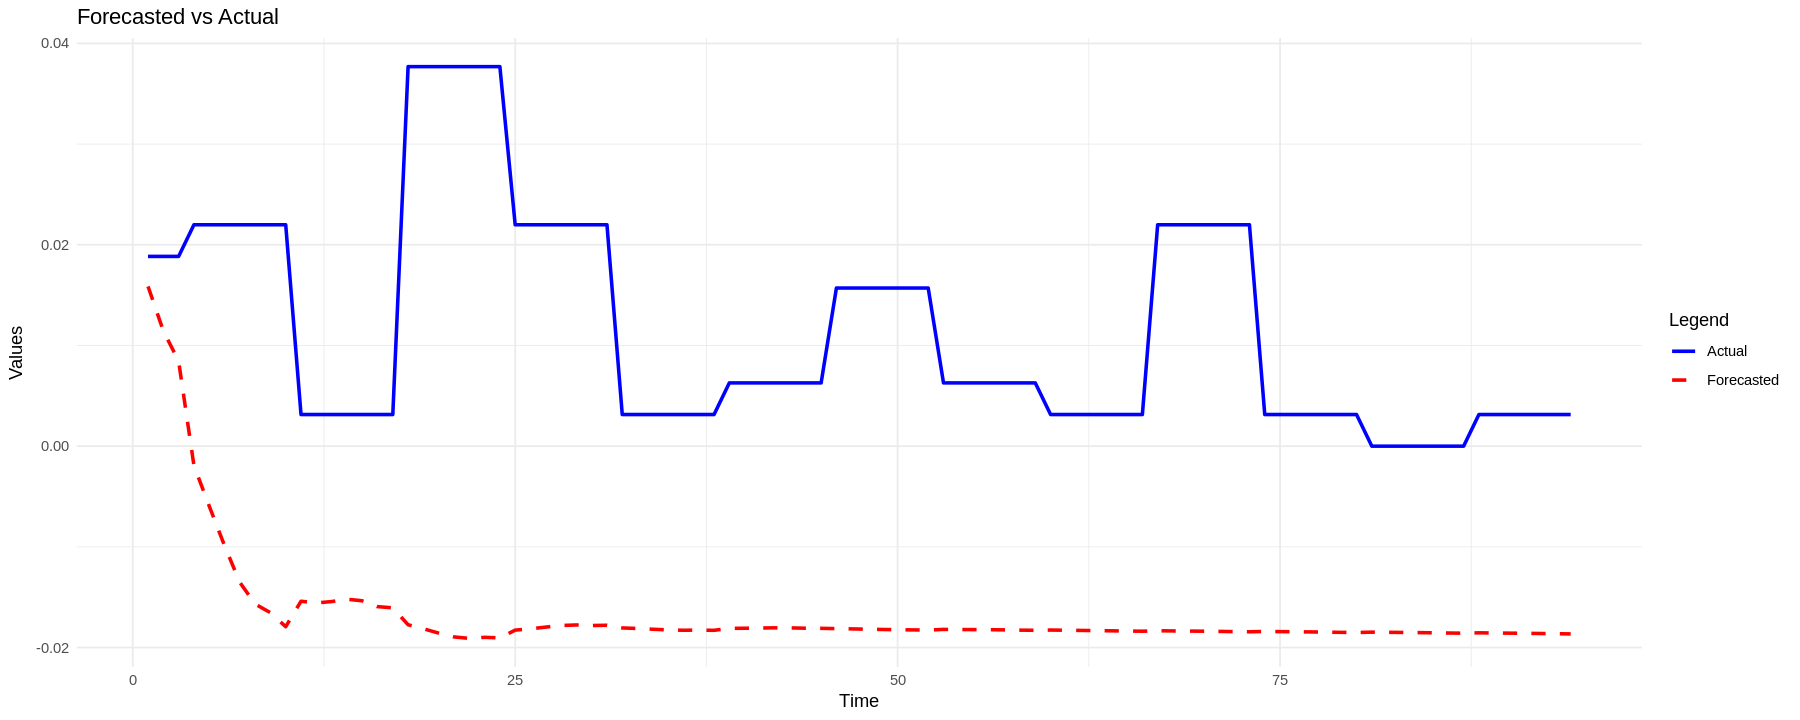

In [321]:
# Forecast and compute errors
forecast_values <- forecast(best_model, h = length(test_data))
errors <- test_data - forecast_values$mean
rmse <- sqrt(mean(errors^2, na.rm = TRUE))
mae <- mean(abs(errors), na.rm = TRUE)
mape <- mean(abs(errors[test_data != 0] / test_data[test_data != 0]), na.rm = TRUE) * 100


cat("\nForecast Errors:\n")
cat("RMSE:", rmse, "\nMAE:", mae, "\nMAPE:", mape, "%\n")

# Create dataframe for plotting
df_plot <- data.frame(
  Date = time(test_data),  # Assuming test_data is a time series
  Actual = as.numeric(test_data),
  Forecasted = as.numeric(forecast_values$mean)
)

# Plot with different colors for Actual and Forecasted values
ggplot(df_plot, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual"), linewidth = 1) +
  geom_line(aes(y = Forecasted, color = "Forecasted"), linewidth = 1, linetype = "dashed") +
  labs(title = "Forecasted vs Actual",
       x = "Time",
       y = "Values",
       color = "Legend") +  # Legend title
  theme_minimal() +
  scale_color_manual(values = c("Actual" = "blue", "Forecasted" = "red"))


## **Interpretation :**
While RMSE and MAE are relatively small, the MAPE is very high (403.47 %), indicating that the model struggles with relative accuracy This suggests the model might not be suitable for making precise predictions, and improvements may be needed (e.g., better feature selection, hyperparameter tuning, or using a different model).


---

# **Conclusion**  

This study analyzed the daily confirmed COVID-19 cases per million people in Algeria to understand infection trends and evaluate containment measures. After testing various ARIMA and SARIMA models, the **best-performing model** was **ARIMA(5,1,1)(1,1,1)[7]**, which demonstrated the lowest AIC (-979.9192), RMSE (0.03048), and MAE (0.02825), indicating strong predictive accuracy.  

Diagnostic tests revealed that the residuals of the model did not follow a normal distribution (Shapiro-Wilk test, p-value < 2.2e-16), but there was no significant autocorrelation (Box-Pierce test, p-value = 0.5301), and the Runs Test suggested randomness in residual signs (p-value = 0.09274). These results indicate that the model effectively captures the underlying pattern of COVID-19 case fluctuations.  

Overall, this forecasting model provides valuable insights into the spread of COVID-19 in Algeria. While limitations exist due to potential underreporting and testing constraints, the findings contribute to better public health planning, allowing authorities to assess past interventions and prepare for future outbreaks more effectively.